In [1]:
import os
os.environ['ZFIT_DISABLE_TF_WARNINGS'] = '1'
# numpy is used for generating, storing, and plotting data
import numpy as np
# zfit will be used for the parameter estimation in the following
import zfit
import uproot
import pandas

# in order to visualise the results of the computation, we use matplotlib
import matplotlib as mpl
if os.path.exists('lhcbStylerc'):
    mpl.rc_file('lhcbStylerc') # some plotting presets i usually use, you can find them in the git-repo
import socket
#if 'jupyter-schmitse-' in socket.gethostname():
#    mpl.rcParams['text.usetex'] = False # no latex on binder
    
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.LHCb2)
#plt.rcParams['text.usetex'] = True
# for histograms boost has an easy api and is very fast
import hist
# for statistical distributions we can use a lot from scipy
from scipy import stats

## File import, data processing
 

In [4]:
path16="/eos/lhcb/user/p/pgaigne/job75-DV-Xiccpp-Collision-2016-MU-1-MVA.root"
path17="/eos/lhcb/user/p/pgaigne/job80-DV-Xiccpp-Collision-2017-MU-0-MVA.root"
path18="/eos/lhcb/user/p/pgaigne/job81-DV-Xiccpp-Collision-2018-MU-0-MVA.root" 


    
paths16=["/eos/lhcb/user/p/pgaigne/job74-DV-Xiccpp-Collision-2016-MD-0-MVA.root",
       "/eos/lhcb/user/p/pgaigne/job74-DV-Xiccpp-Collision-2016-MD-1-MVA.root",
       "/eos/lhcb/user/p/pgaigne/job75-DV-Xiccpp-Collision-2016-MU-0-MVA.root",
       "/eos/lhcb/user/p/pgaigne/job75-DV-Xiccpp-Collision-2016-MU-1-MVA.root"]

paths17=["/eos/lhcb/user/p/pgaigne/job78-DV-Xiccpp-Collision-2017-MD-0-MVA.root",
       "/eos/lhcb/user/p/pgaigne/job80-DV-Xiccpp-Collision-2017-MU-0-MVA.root"]

paths18=["/eos/lhcb/user/p/pgaigne/job79-DV-Xiccpp-Collision-2018-MD-0-MVA.root",
       "/eos/lhcb/user/p/pgaigne/job81-DV-Xiccpp-Collision-2018-MU-0-MVA.root"]

# paths=["/eos/lhcb/user/p/pgaigne/job74-DV-Xiccpp-Collision-2016-MD-0-MVA-WS.root",
#        "/eos/lhcb/user/p/pgaigne/job74-DV-Xiccpp-Collision-2016-MD-1-MVA-WS.root",
#        "/eos/lhcb/user/p/pgaigne/job75-DV-Xiccpp-Collision-2016-MU-0-MVA-WS.root",
#        "/eos/lhcb/user/p/pgaigne/job75-DV-Xiccpp-Collision-2016-MU-1-MVA-WS.root"]

data_df = pandas.DataFrame([])

branches_we_want = ["Polarity","Xicc_ID", 
                    #"BDT","BDTG","MLP", "Lc_ENDVERTEX_CHI2_NDOF", "sum_Xicc_Daughters_PT", "Xicc_ENDVERTEX_CHI2_NDOF",
                        "Lc_M","Lc_DIRA_OWNPV", "Lc_IPCHI2_OWNPV", "Lc_ENDVERTEX_CHI2","Lc_ENDVERTEX_NDOF", "Lc_P", "Lc_PT",# "Lc_LTIME",
#                         "LcP_TRACK_CHI2NDOF","LcP_P", "LcP_PT", "LcP_PIDp", "LcP_PIDK", "LcP_IPCHI2_OWNPV",
#                         "LcPi_TRACK_CHI2NDOF","LcPi_P", "LcPi_PT", "LcPi_PIDK", "LcPi_IPCHI2_OWNPV",
#                         "LcK_TRACK_CHI2NDOF","LcK_P", "LcK_PT", "LcK_PIDK", "LcK_IPCHI2_OWNPV",
                        "XiccK_TRACK_CHI2NDOF","XiccK_TRACK_GhostProb", "XiccK_IPCHI2_OWNPV", "XiccK_PT", "XiccK_P","XiccK_ProbNNk", "XiccK_PIDK",
                        "XiccPi1_TRACK_CHI2NDOF","XiccPi1_TRACK_GhostProb", "XiccPi1_IPCHI2_OWNPV", "XiccPi1_PT", "XiccPi1_P","XiccPi1_ProbNNpi", "XiccPi1_PIDK",
                        "XiccPi2_TRACK_CHI2NDOF","XiccPi2_TRACK_GhostProb", "XiccPi2_IPCHI2_OWNPV", "XiccPi2_PT", "XiccPi2_P","XiccPi2_ProbNNpi", "XiccPi2_PIDK",
                          "Xicc_M","Xicc_IPCHI2_OWNPV","Xicc_DIRA_OWNPV", "Xicc_ENDVERTEX_CHI2","Xicc_ENDVERTEX_NDOF", "Xicc_FDCHI2_OWNPV","Xicc_CHI2NDOF_DTF_Lc"] 


# path16="/eos/lhcb/user/p/pgaigne/job101-DV-Xiccpp-Collision-2016-MD-0.root"
# path17="/eos/lhcb/user/p/pgaigne/job108-DV-Xiccpp-Collision-2017-MD-0.root"
# path18="/eos/lhcb/user/p/pgaigne/job107-DV-Xiccpp-Collision-2018-MD-0.root" 
# path18b="/eos/lhcb/user/p/pgaigne/job109-DV-Xiccpp-Collision-2018-MD-0.root" 
# path16mc="/eos/lhcb/user/p/pgaigne/MC/26266050/MC-2016-26266050.root" 

path16="/eos/lhcb/user/p/pgaigne/STEP2/2016/job74-CombDVntuple-Lc_Cuts.root"
path17="/eos/lhcb/user/p/pgaigne/STEP2/2017/job108-DV-Xiccpp-Collision-2017-MD-0.root"
path18="/eos/lhcb/user/p/pgaigne/STEP2/2018/job107-DV-Xiccpp-Collision-2018-MD-0.root" 
path18b="/eos/lhcb/user/p/pgaigne/STEP2/2018/job109-DV-Xiccpp-Collision-2018-MD-0.root"
# path18b="/eos/lhcb/user/p/pgaigne/job142-Xiccpst-2018-MD-0.root" 
 
path16mc="/eos/lhcb/user/p/pgaigne/MC/26266050/MC-2016-26266050.root" 

file =  uproot.open(path16)
tree = file['tuple_sel_rec/DecayTree']
data_df16 = tree.arrays(expressions = branches_we_want, library='pd')
file.close()

file =  uproot.open(path17)
tree = file['tuple_sel_rec/DecayTree']
data_df17 = tree.arrays(expressions = branches_we_want, library='pd')
file.close()

file =  uproot.open(path18)
tree = file['tuple_sel_rec/DecayTree']
data_df18 = tree.arrays(expressions = branches_we_want, library='pd')
file.close()

file =  uproot.open(path18b)
tree = file['tuple_sel_rec/DecayTree']
data_df18b = tree.arrays(expressions = branches_we_want, library='pd')
file.close()
    
file =  uproot.open(path16mc)
tree = file['tuple_sel_rec/DecayTree']
data_df16mc = tree.arrays(expressions = branches_we_want+["Xicc_TRUEID","Lc_TRUEID","LcP_TRUEID","LcPi_TRUEID","LcK_TRUEID","LcP_MC_MOTHER_ID","LcP_MC_GD_MOTHER_ID","LcK_MC_MOTHER_ID","LcK_MC_GD_MOTHER_ID","LcPi_MC_MOTHER_ID","LcPi_MC_GD_MOTHER_ID","XiccPi1_TRUEID","XiccPi1_MC_MOTHER_ID","XiccPi2_TRUEID","XiccPi2_MC_MOTHER_ID","XiccK_TRUEID","XiccK_MC_MOTHER_ID"], library='pd')
file.close()   


In [5]:
data_df16["Lc_ENDVERTEX_CHI2_NDOF"] = data_df16.Lc_ENDVERTEX_CHI2/data_df16.Lc_ENDVERTEX_NDOF
data_df17["Lc_ENDVERTEX_CHI2_NDOF"] = data_df17.Lc_ENDVERTEX_CHI2/data_df17.Lc_ENDVERTEX_NDOF
data_df18["Lc_ENDVERTEX_CHI2_NDOF"] = data_df18.Lc_ENDVERTEX_CHI2/data_df18.Lc_ENDVERTEX_NDOF
data_df18b["Lc_ENDVERTEX_CHI2_NDOF"] = data_df18b.Lc_ENDVERTEX_CHI2/data_df18b.Lc_ENDVERTEX_NDOF
data_df16mc["Lc_ENDVERTEX_CHI2_NDOF"] = data_df16mc.Lc_ENDVERTEX_CHI2/data_df16mc.Lc_ENDVERTEX_NDOF

data_df16["Xicc_ENDVERTEX_CHI2_NDOF"] = data_df16.Xicc_ENDVERTEX_CHI2/data_df16.Xicc_ENDVERTEX_NDOF
data_df17["Xicc_ENDVERTEX_CHI2_NDOF"] = data_df17.Xicc_ENDVERTEX_CHI2/data_df17.Xicc_ENDVERTEX_NDOF
data_df18["Xicc_ENDVERTEX_CHI2_NDOF"] = data_df18.Xicc_ENDVERTEX_CHI2/data_df18.Xicc_ENDVERTEX_NDOF
data_df18b["Xicc_ENDVERTEX_CHI2_NDOF"] = data_df18b.Xicc_ENDVERTEX_CHI2/data_df18b.Xicc_ENDVERTEX_NDOF

In [6]:
cuts = "(Xicc_M>3800)&(Xicc_M<3900)&(Lc_M>2270)&(Lc_M<2306)& XiccK_PIDK>-40"

data_df16_cuts = data_df16.query(cuts)
data_df17_cuts = data_df17.query(cuts)
data_df18_cuts = data_df18.query(cuts)
data_df18b_cuts = data_df18b.query(cuts)

MCcuts = "abs(Xicc_M-3621)<15&(Lc_M>2270)&(Lc_M<2306)&XiccK_PIDK>-40&(abs(Xicc_TRUEID)==4422&abs(Lc_TRUEID)==4122&abs(LcP_TRUEID)==2212&abs(LcPi_TRUEID)==211&abs(LcK_TRUEID)==321&(abs(LcP_MC_MOTHER_ID)==4122|abs(LcP_MC_GD_MOTHER_ID)==4122)&(abs(LcK_MC_MOTHER_ID)==4122|abs(LcK_MC_GD_MOTHER_ID)==4122)&(abs(LcPi_MC_MOTHER_ID)==4122|abs(LcPi_MC_GD_MOTHER_ID)==4122)&abs(XiccPi1_TRUEID)==211&abs(XiccPi1_MC_MOTHER_ID)==4422&abs(XiccPi2_TRUEID)==211&abs(XiccPi2_MC_MOTHER_ID)==4422&abs(XiccK_TRUEID)==321&abs(XiccK_MC_MOTHER_ID)==4422)"
data_df16mc_cuts = data_df16mc.query(MCcuts)

# & XiccK_PIDK>10&XiccPi1_PIDK<0&XiccPi2_PIDK<0

In [7]:
obs_min = 3470
obs_max = 3770
obs_bin_width = 3
obs_bin = int((obs_max-obs_min)/obs_bin_width)

In [8]:
def plot(data,bins, obs_min, obs_max, xlabel, label = None, density = False):
    h, bins = np.histogram(data, bins=bins, range=[obs_min, obs_max])
    mplhep.histplot(h, bins, density=density, histtype="step", label = label)#, hatch='/')
    plt.xlabel(xlabel)
    if density:
        plt.ylabel(f'Density')
    else:
        plt.ylabel(f'Events/( {obs_bin_width} MeV/$c^2$ )')
    plt.xlim(bins[0], bins[-1])

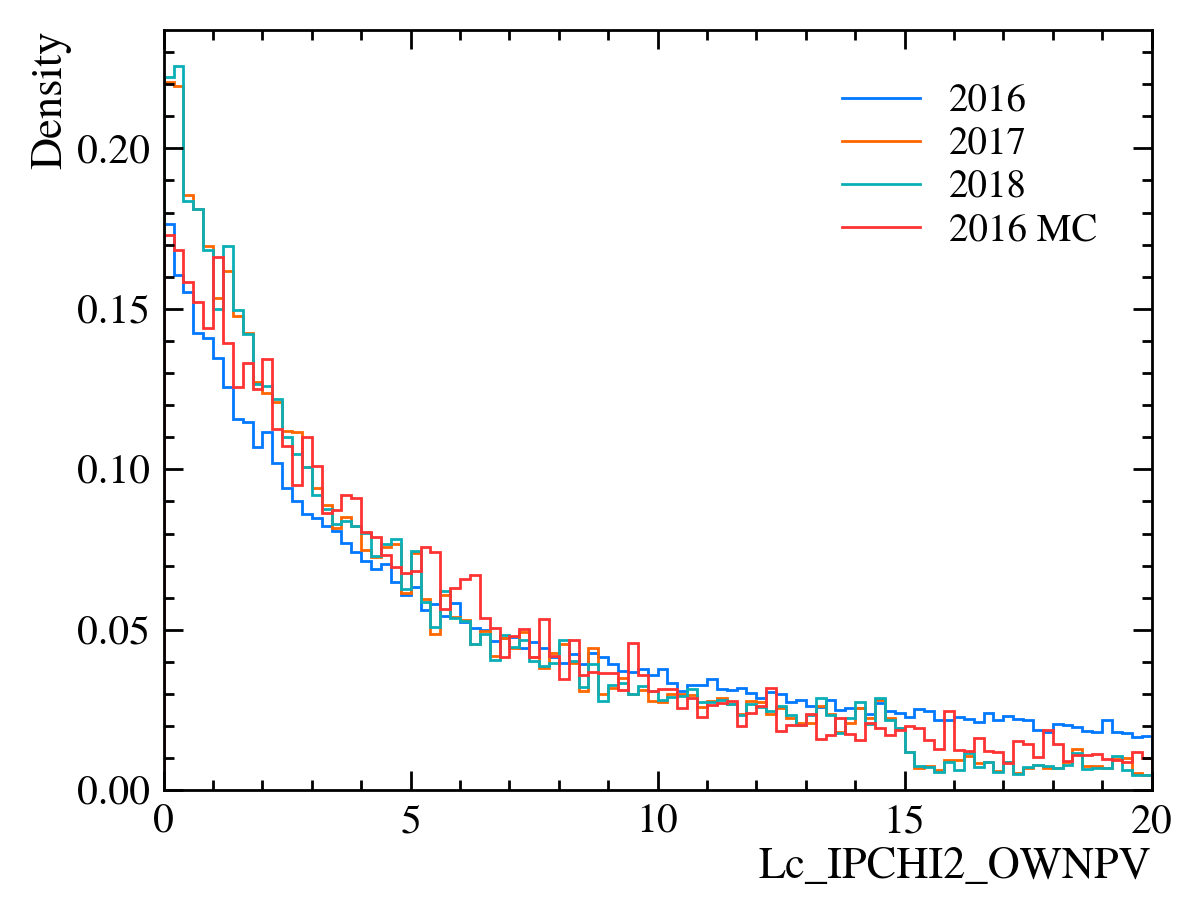

In [9]:
plot(data_df16.Lc_IPCHI2_OWNPV, 100, 0, 20,'Lc_IPCHI2_OWNPV', density = True , label = r"2016")
plot(data_df17.Lc_IPCHI2_OWNPV, 100, 0, 20,'Lc_IPCHI2_OWNPV', density = True  , label = r"2017")
plot(data_df18.Lc_IPCHI2_OWNPV, 100, 0, 20,'Lc_IPCHI2_OWNPV', density = True  , label = r"2018")
plot(data_df16mc.Lc_IPCHI2_OWNPV, 100, 0, 20,'Lc_IPCHI2_OWNPV', density = True , label = r"2016 MC")
plt.legend(loc='best')

/cvmfs/lhcbdev.cern.ch/conda/envs/default/2022-11-21_11-58/linux-64/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


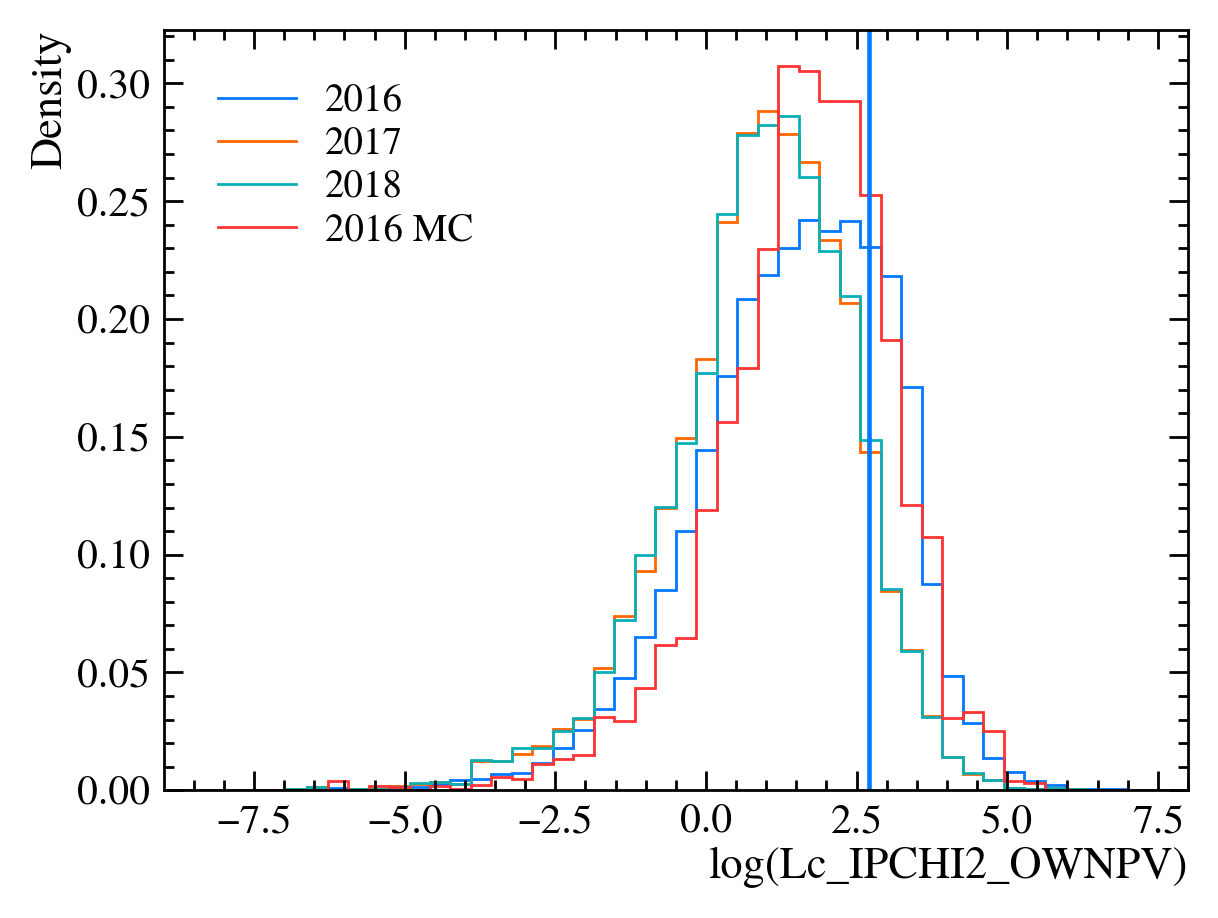

In [23]:
plot(np.log(data_df16_cuts.Lc_IPCHI2_OWNPV), 50, -9, 8,'log(Lc_IPCHI2_OWNPV)', density = True  , label = r"2016")
plot(np.log(data_df17_cuts.Lc_IPCHI2_OWNPV), 50, -9, 8,'log(Lc_IPCHI2_OWNPV)', density = True  , label = r"2017")
plot(np.log(data_df18_cuts.Lc_IPCHI2_OWNPV), 50, -9, 8,'log(Lc_IPCHI2_OWNPV)', density = True  , label = r"2018")
plot(np.log(data_df16mc_cuts.Lc_IPCHI2_OWNPV), 50, -9, 8,'log(Lc_IPCHI2_OWNPV)', density = True  , label = r"2016 MC")
plt.legend(loc='best')
plt.axvline(x=np.log(15))

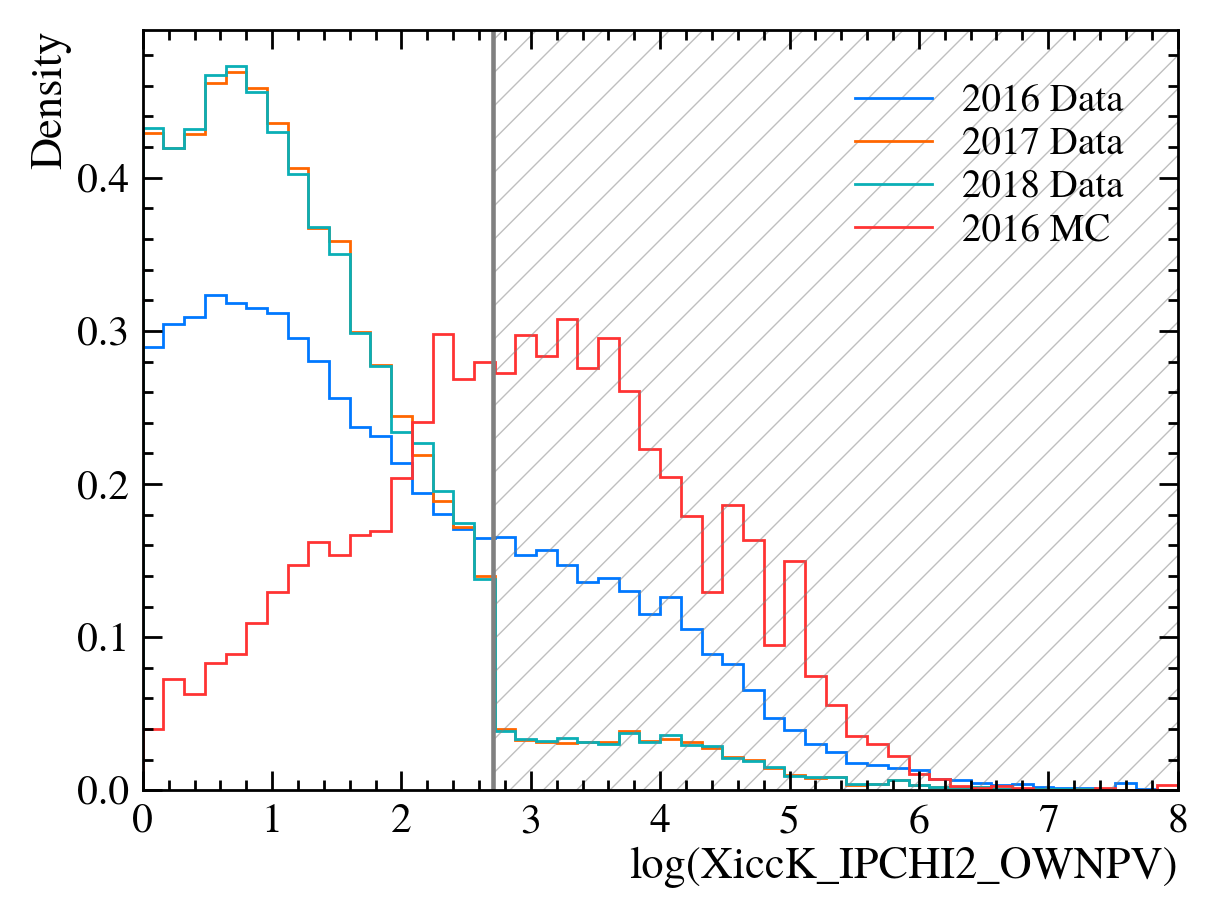

In [11]:
plot(np.log(data_df16.XiccK_IPCHI2_OWNPV), 50, 0, 8,'log(XiccK_IPCHI2_OWNPV)', density = True  , label = r"2016 Data")
plot(np.log(data_df17.XiccK_IPCHI2_OWNPV), 50, 0, 8,'log(XiccK_IPCHI2_OWNPV)', density = True  , label = r"2017 Data")
plot(np.log(data_df18.XiccK_IPCHI2_OWNPV), 50, 0, 8,'log(XiccK_IPCHI2_OWNPV)', density = True  , label = r"2018 Data")
plot(np.log(data_df16mc_cuts.XiccK_IPCHI2_OWNPV), 50, 0, 8,'log(XiccK_IPCHI2_OWNPV)', density = True  , label = r"2016 MC")
plt.legend(loc='upper right')
plt.axvspan(np.log(15), 8, alpha=.5,hatch='/', color='grey', fill=False, linewidth=0.0)
plt.axvline(x=np.log(15), color='grey')

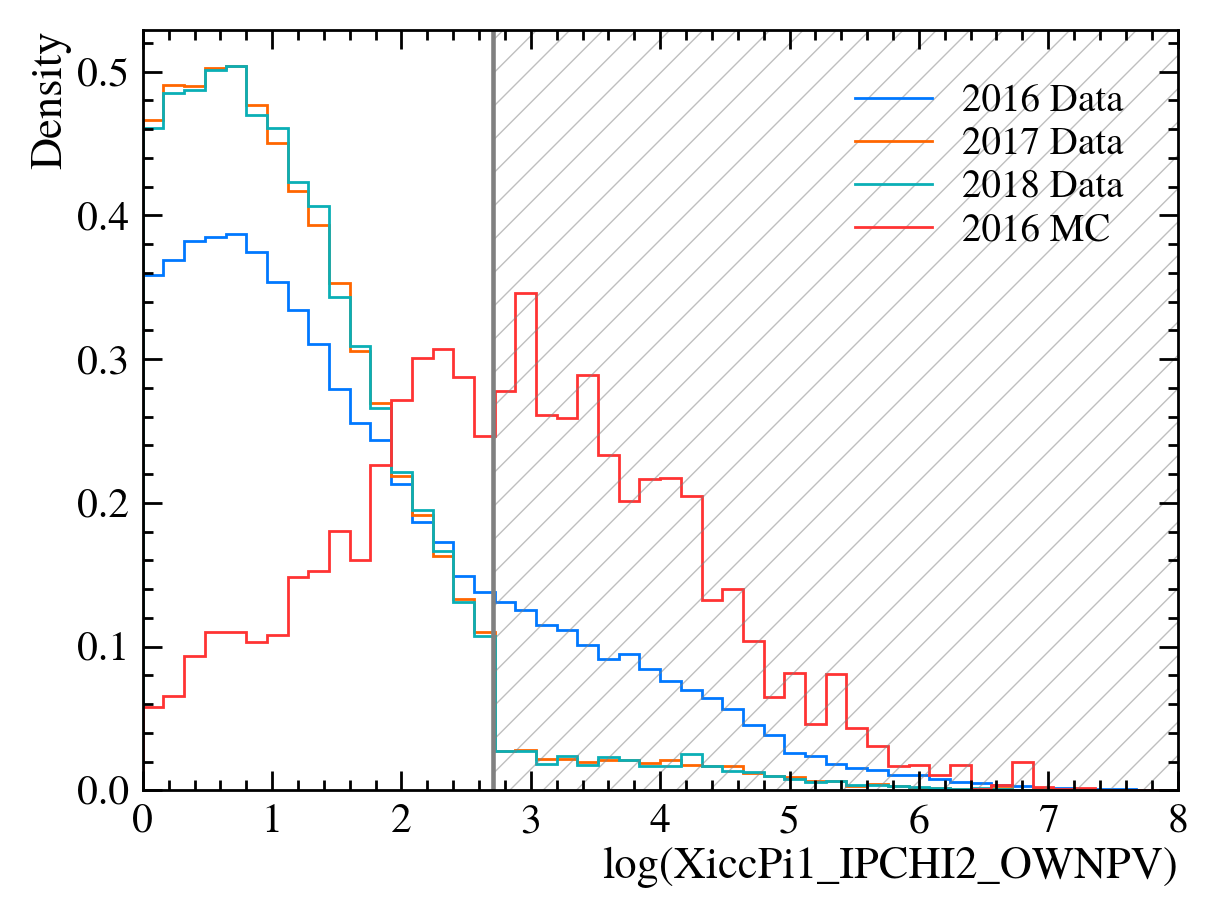

In [84]:
plot(np.log(data_df16.XiccPi1_IPCHI2_OWNPV), 50, 0, 8,'log(XiccPi1_IPCHI2_OWNPV)', density = True  , label = r"2016 Data")
plot(np.log(data_df17.XiccPi1_IPCHI2_OWNPV), 50, 0, 8,'log(XiccPi1_IPCHI2_OWNPV)', density = True  , label = r"2017 Data")
plot(np.log(data_df18.XiccPi1_IPCHI2_OWNPV), 50, 0, 8,'log(XiccPi1_IPCHI2_OWNPV)', density = True  , label = r"2018 Data")
plot(np.log(data_df16mc_cuts.XiccPi1_IPCHI2_OWNPV), 50, 0, 8,'log(XiccPi1_IPCHI2_OWNPV)', density = True  , label = r"2016 MC")
plt.legend(loc='upper right')
plt.axvspan(np.log(15), 8, alpha=.5,hatch='/', color='grey', fill=False, linewidth=0.0)
plt.axvline(x=np.log(15), color='grey')

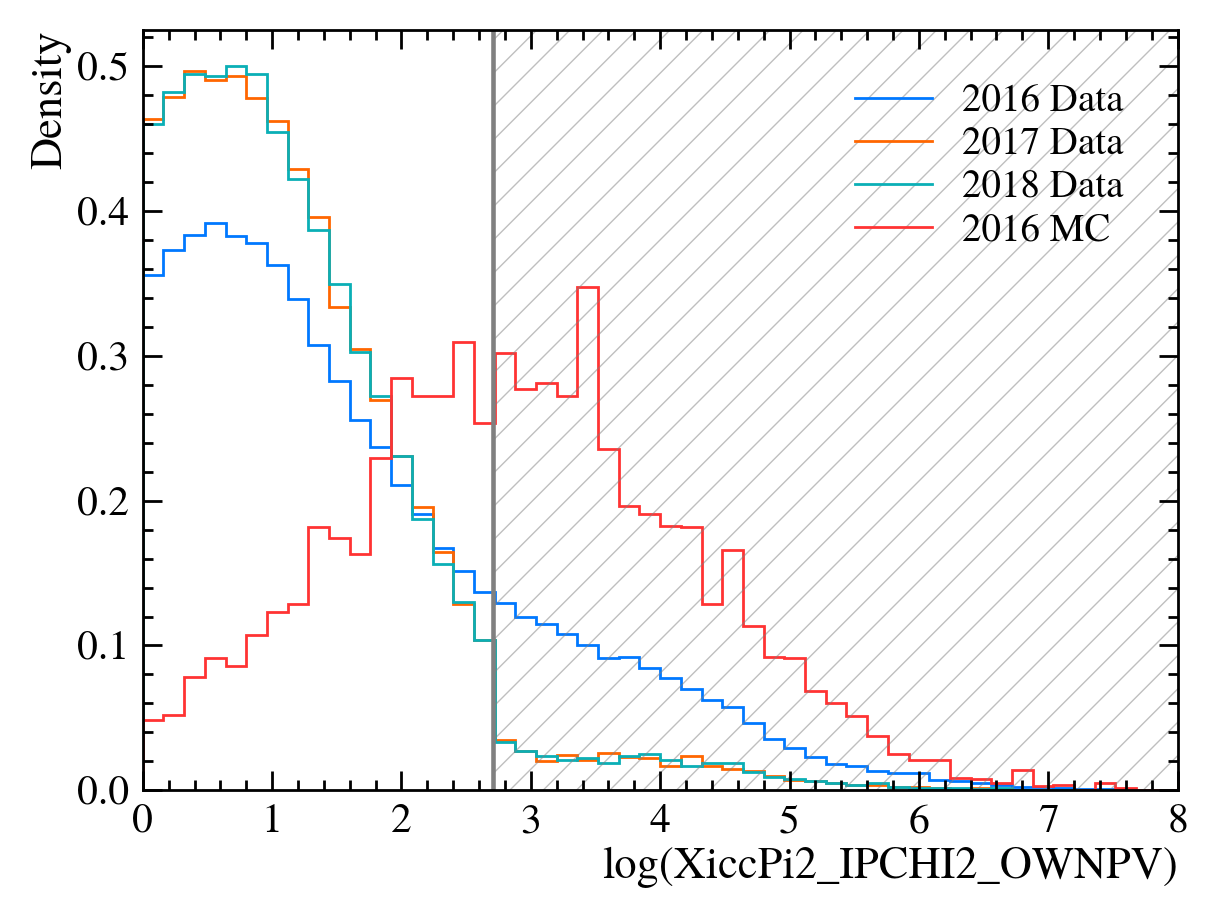

In [11]:
plot(np.log(data_df16.XiccPi2_IPCHI2_OWNPV), 50, 0, 8,'log(XiccPi2_IPCHI2_OWNPV)', density = True  , label = r"2016 Data")
plot(np.log(data_df17.XiccPi2_IPCHI2_OWNPV), 50, 0, 8,'log(XiccPi2_IPCHI2_OWNPV)', density = True  , label = r"2017 Data")
plot(np.log(data_df18.XiccPi2_IPCHI2_OWNPV), 50, 0, 8,'log(XiccPi2_IPCHI2_OWNPV)', density = True  , label = r"2018 Data")
plot(np.log(data_df16mc_cuts.XiccPi2_IPCHI2_OWNPV), 50, 0, 8,'log(XiccPi2_IPCHI2_OWNPV)', density = True  , label = r"2016 MC")
plt.legend(loc='upper right')
plt.axvspan(np.log(15), 8, alpha=.5,hatch='/', color='grey', fill=False, linewidth=0.0)
plt.axvline(x=np.log(15), color='grey')

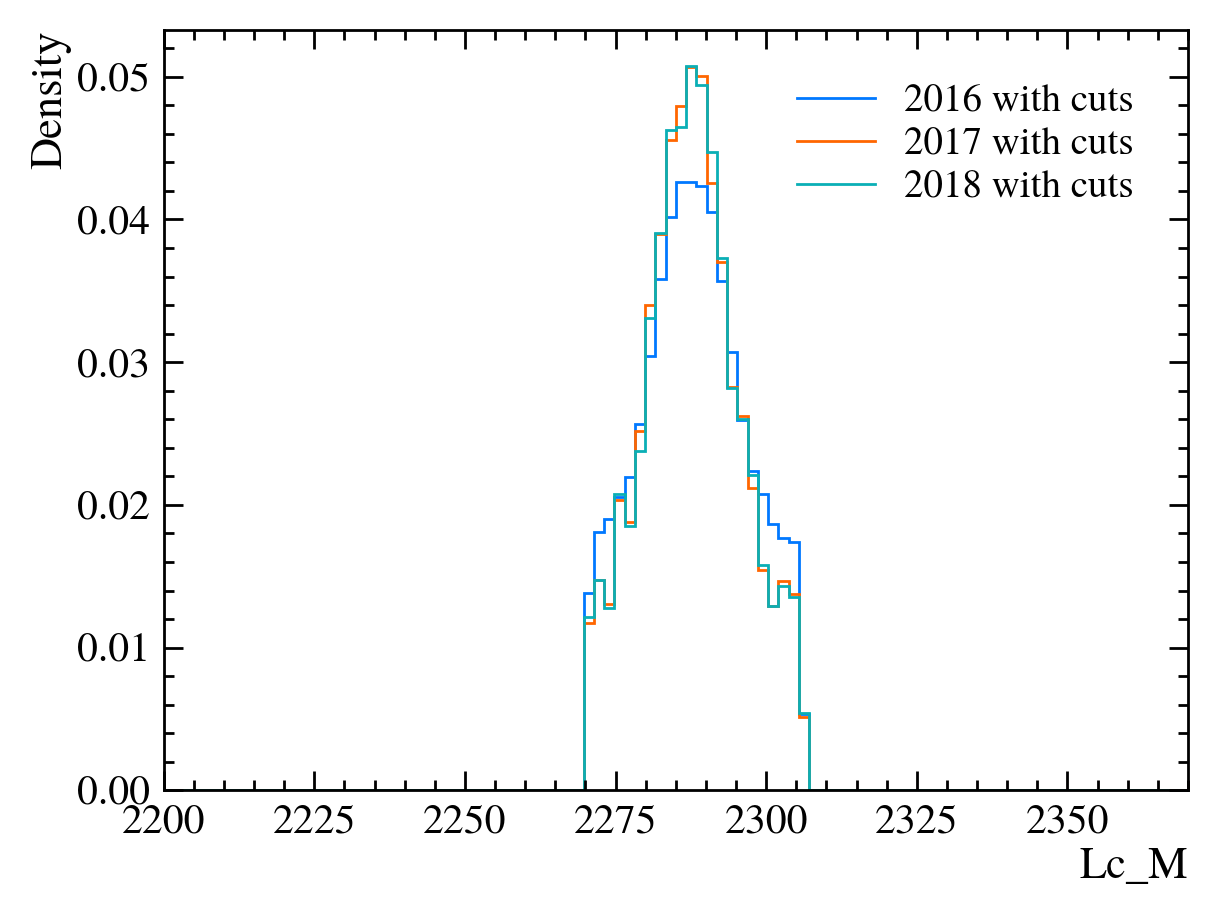

In [12]:
# # plot(data_df16.Lc_M, 100, 2200, 2370,'Lc_M', density = True , label = r"2016")
plot(data_df16_cuts.Lc_M, 100, 2200, 2370,'Lc_M', density = True , label = r"2016 with cuts")
# plot(data_df17.Lc_M, 100, 2200, 2370,'Lc_M', density = True  , label = r"2017")
# plot(data_df18.Lc_M, 100, 2200, 2370,'Lc_M', density = True  , label = r"2018")
plot(data_df17_cuts.Lc_M, 100, 2200, 2370,'Lc_M', density = True  , label = r"2017 with cuts")
plot(data_df18_cuts.Lc_M, 100, 2200, 2370,'Lc_M', density = True  , label = r"2018 with cuts")
plt.legend(loc='best')

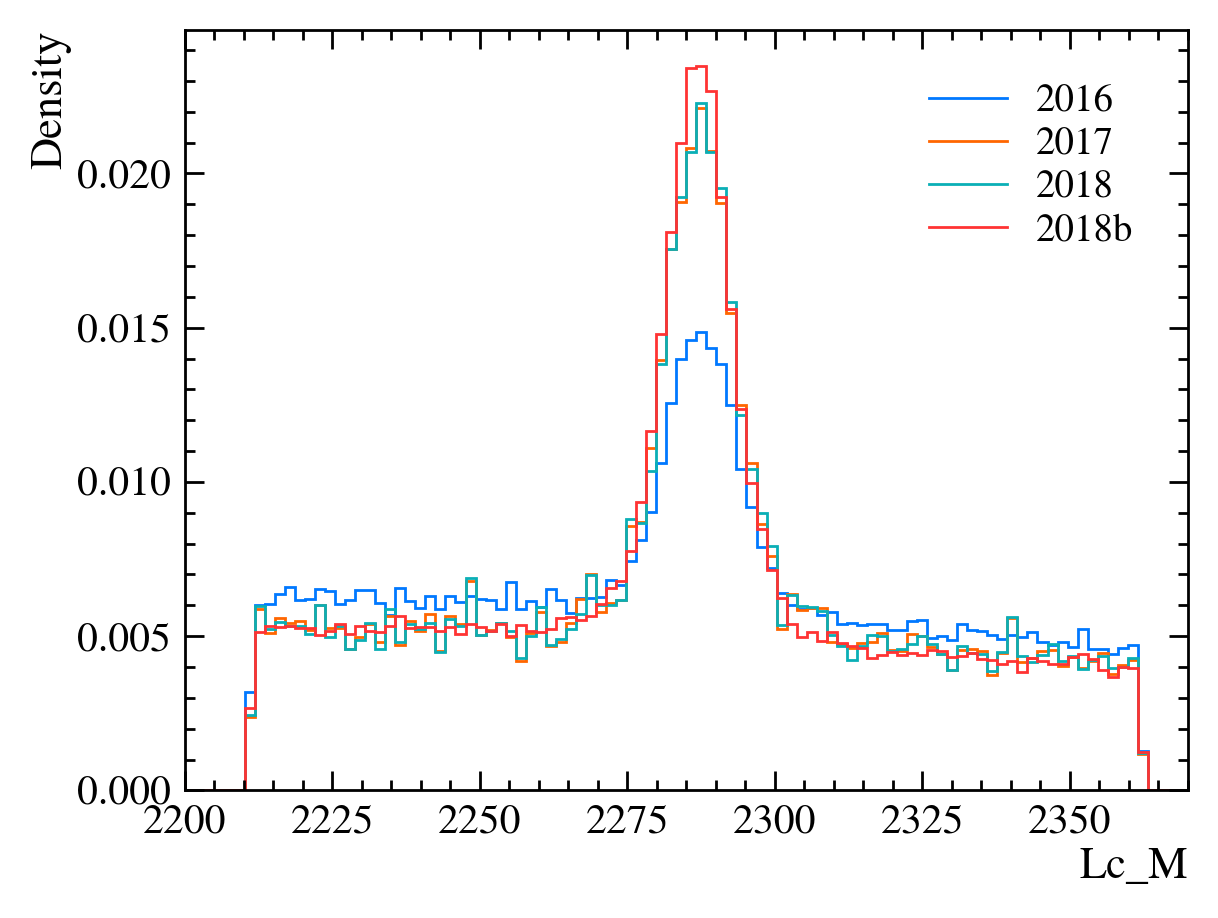

In [13]:
plot(data_df16.Lc_M, 100, 2200, 2370,'Lc_M', density = True , label = r"2016")
# plot(data_df16_cuts.Lc_M, 100, 2200, 2370,'Lc_M', density = True , label = r"2016 with cuts")
plot(data_df17.Lc_M, 100, 2200, 2370,'Lc_M', density = True  , label = r"2017")
plot(data_df18.Lc_M, 100, 2200, 2370,'Lc_M', density = True  , label = r"2018")
plot(data_df18b.Lc_M, 100, 2200, 2370,'Lc_M', density = True  , label = r"2018b")
# plot(data_df17_cuts.Lc_M, 100, 2200, 2370,'Lc_M', density = True  , label = r"2017 with cuts")
# plot(data_df18_cuts.Lc_M, 100, 2200, 2370,'Lc_M', density = True  , label = r"2018 with cuts")
plt.legend(loc='best')

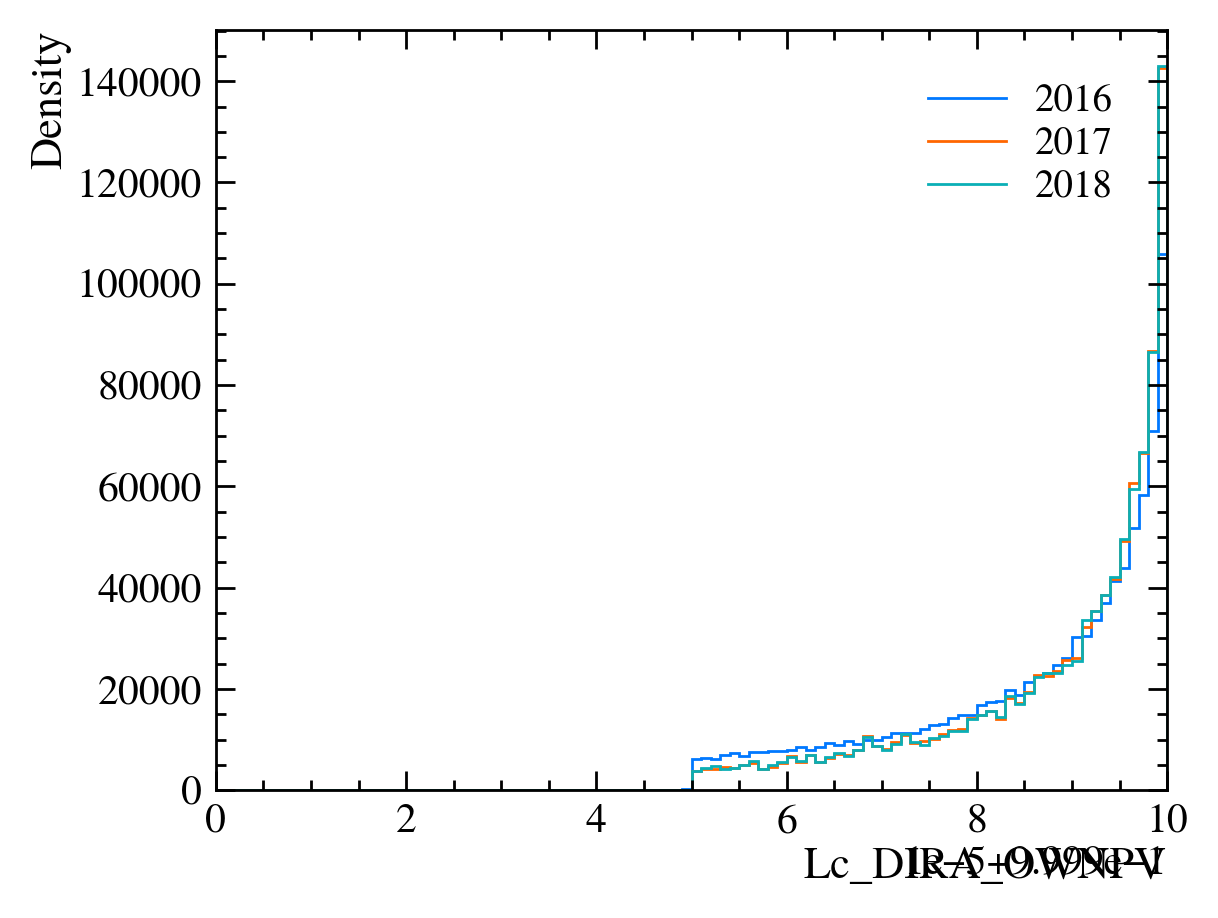

In [14]:
plot(data_df16.Lc_DIRA_OWNPV, 100, 0.9999, 1,'Lc_DIRA_OWNPV', density = True , label = r"2016")
plot(data_df17.Lc_DIRA_OWNPV, 100, 0.9999, 1,'Lc_DIRA_OWNPV', density = True  , label = r"2017")
plot(data_df18.Lc_DIRA_OWNPV, 100, 0.9999, 1,'Lc_DIRA_OWNPV', density = True  , label = r"2018")
plt.legend(loc='best')

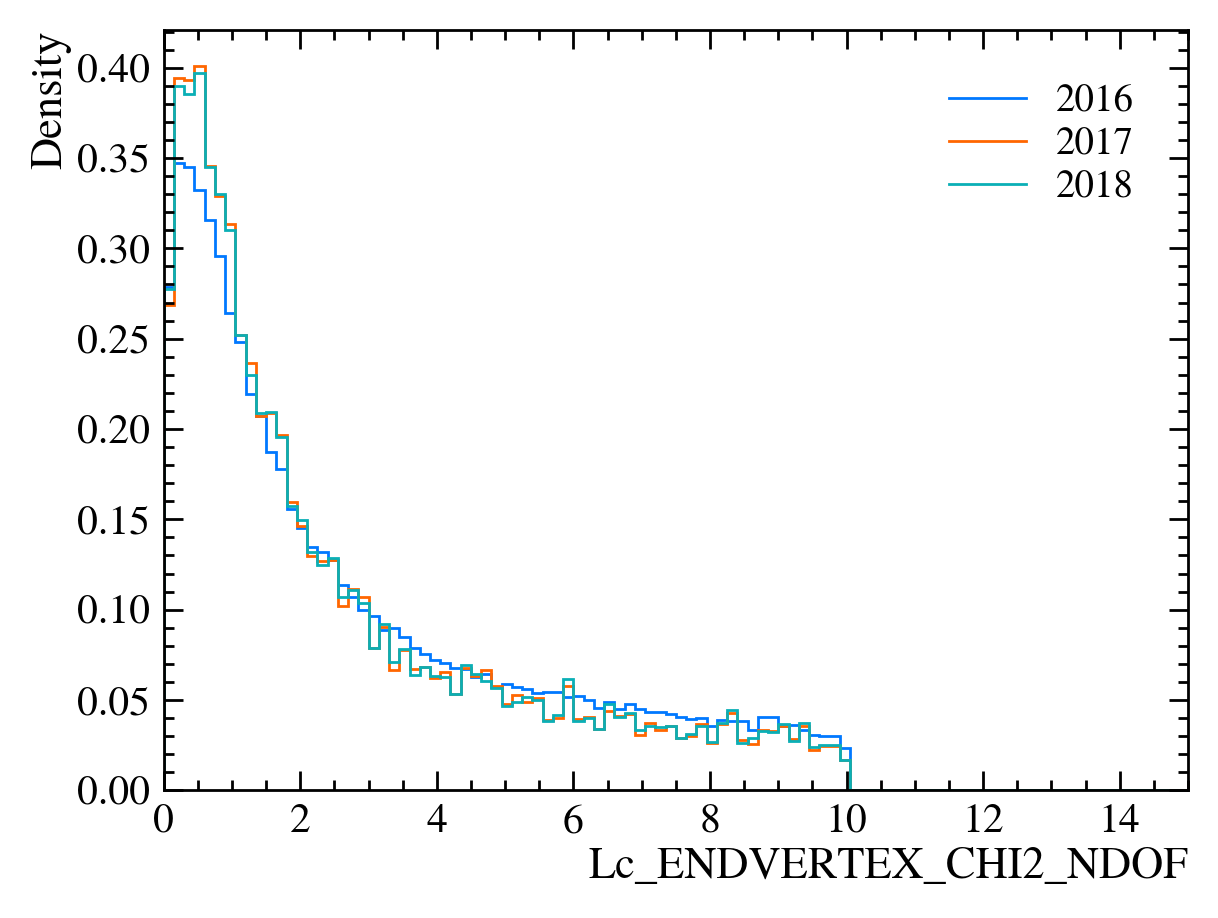

In [15]:
plot(data_df16.Lc_ENDVERTEX_CHI2_NDOF, 100, 0, 15,'Lc_ENDVERTEX_CHI2_NDOF', density = True , label = r"2016")
plot(data_df17.Lc_ENDVERTEX_CHI2_NDOF, 100, 0, 15,'Lc_ENDVERTEX_CHI2_NDOF', density = True  , label = r"2017")
plot(data_df18.Lc_ENDVERTEX_CHI2_NDOF, 100, 0, 15,'Lc_ENDVERTEX_CHI2_NDOF', density = True  , label = r"2018")
plt.legend(loc='best')

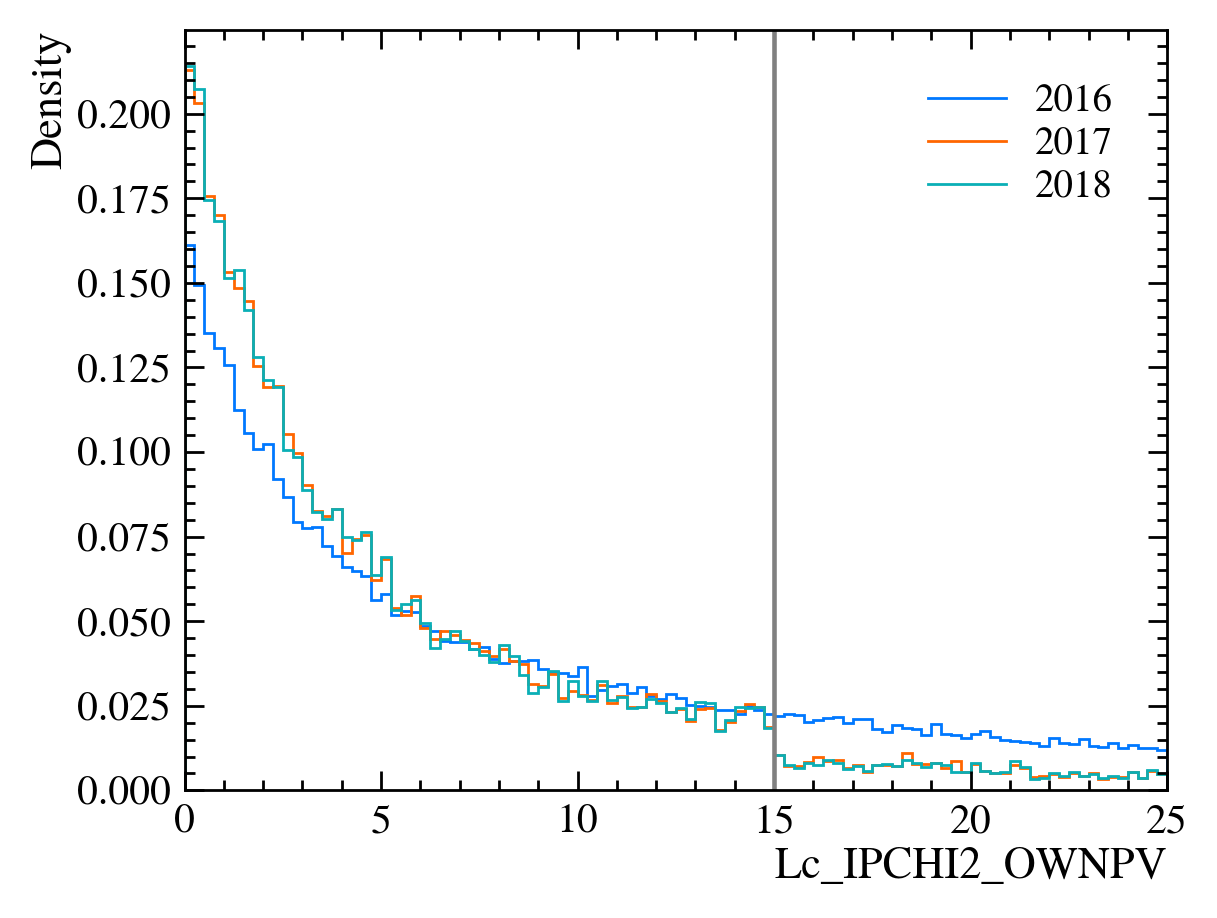

In [86]:
plot(data_df16.Lc_IPCHI2_OWNPV, 100, 0, 25,'Lc_IPCHI2_OWNPV', density = True , label = r"2016")
plot(data_df17.Lc_IPCHI2_OWNPV, 100, 0, 25,'Lc_IPCHI2_OWNPV', density = True  , label = r"2017")
plot(data_df18.Lc_IPCHI2_OWNPV, 100, 0, 25,'Lc_IPCHI2_OWNPV', density = True  , label = r"2018")
# plot(data_df16mc_cuts.Lc_IPCHI2_OWNPV, 100, 0, 25,'Lc_IPCHI2_OWNPV', density = True  , label = r"2016 MC")
plt.legend(loc='best')
plt.axvline(x=15, color='grey')

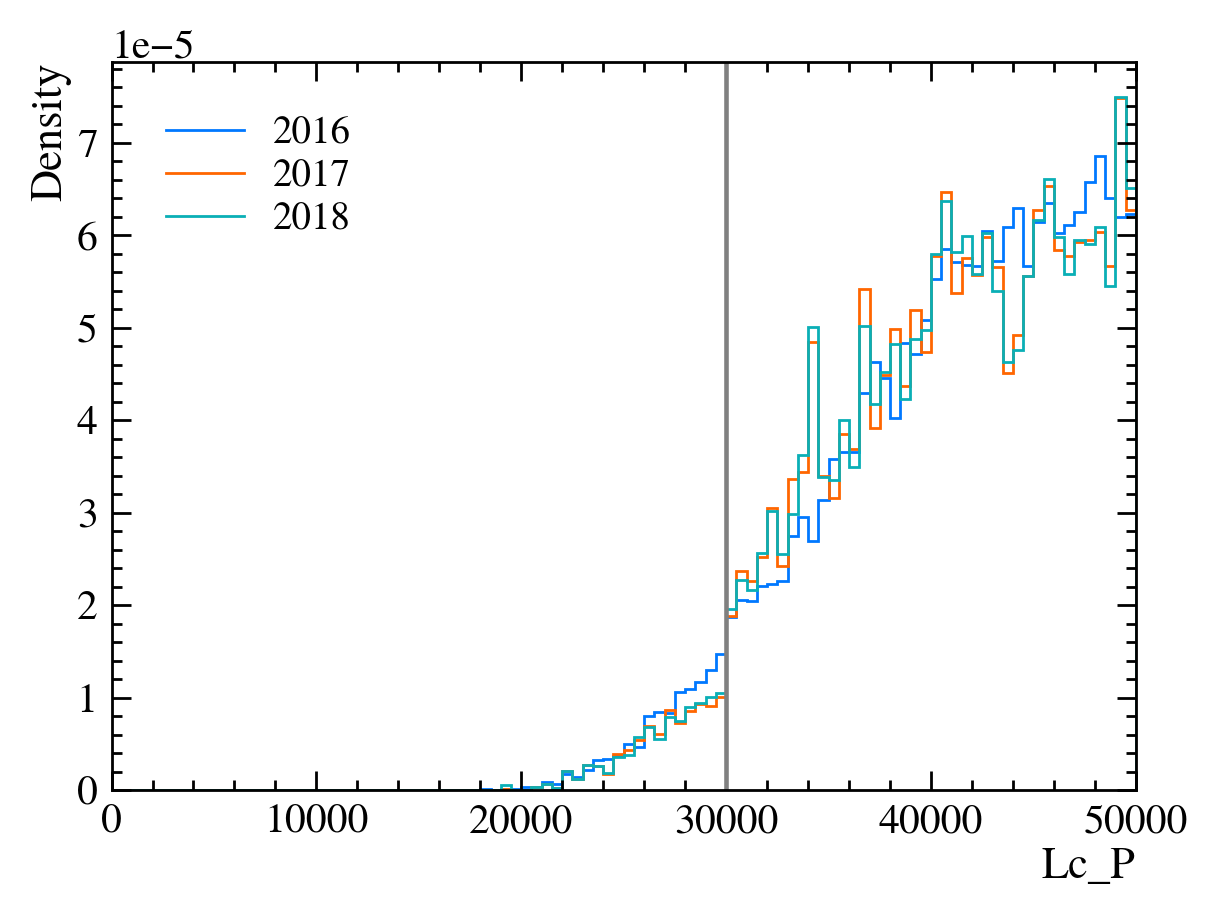

In [19]:
plot(data_df16.Lc_P, 100, 0, 50000,'Lc_P', density = True , label = r"2016")
plot(data_df17.Lc_P, 100, 0, 50000,'Lc_P', density = True  , label = r"2017")
plot(data_df18.Lc_P, 100, 0, 50000,'Lc_P', density = True  , label = r"2018")
plt.legend(loc='upper left')
plt.axvline(x=30000, color='grey')

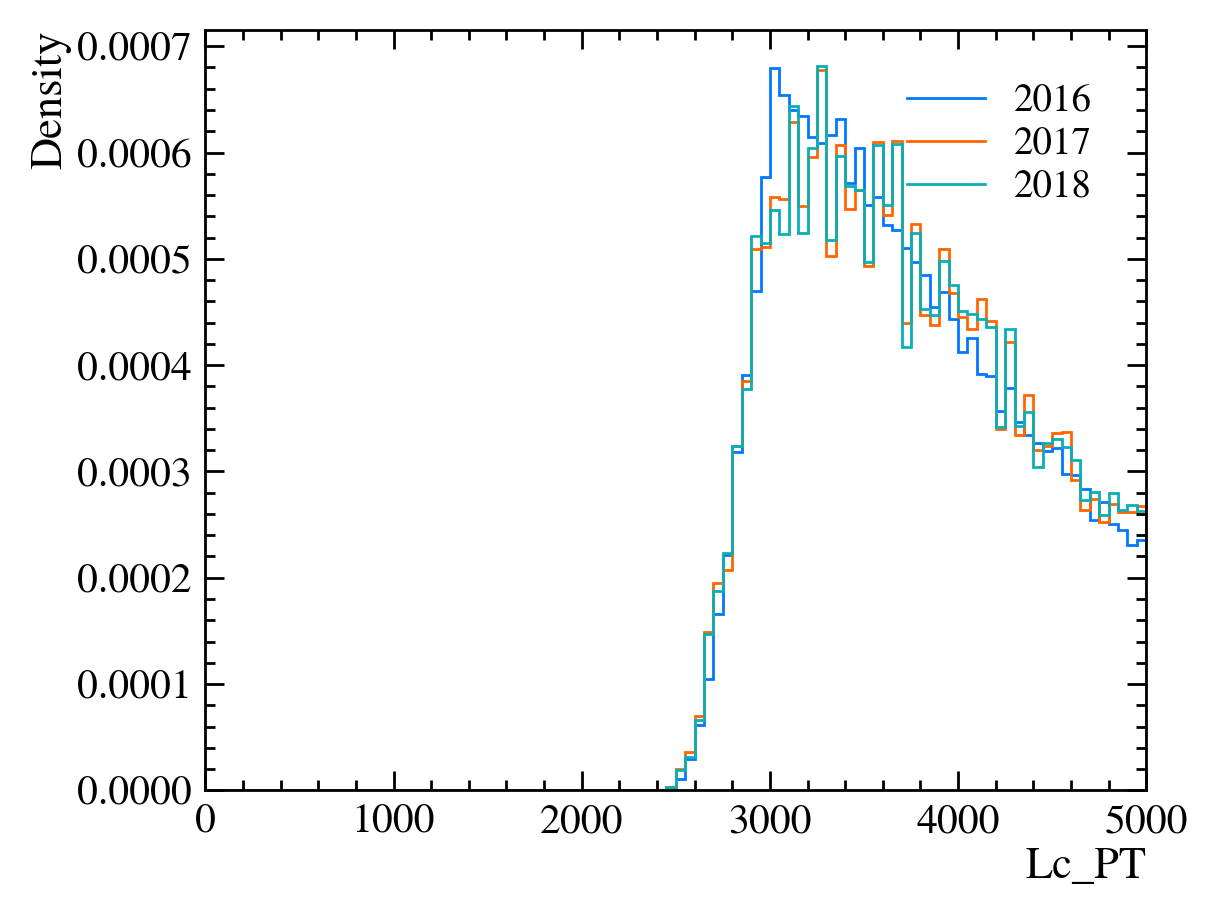

In [20]:
plot(data_df16.Lc_PT, 100, 0, 5000,'Lc_PT', density = True , label = r"2016")
plot(data_df17.Lc_PT, 100, 0, 5000,'Lc_PT', density = True  , label = r"2017")
plot(data_df18.Lc_PT, 100, 0, 5000,'Lc_PT', density = True  , label = r"2018")
plt.legend(loc='best')

## Lc daughters

### LcP

In [21]:
plot(data_df16.LcP_TRACK_CHI2NDOF, 100, 0, 5,'LcP_TRACK_CHI2NDOF', density = True , label = r"2016")
plot(data_df17.LcP_TRACK_CHI2NDOF, 100, 0, 5,'LcP_TRACK_CHI2NDOF', density = True  , label = r"2017")
plot(data_df18.LcP_TRACK_CHI2NDOF, 100, 0, 5,'LcP_TRACK_CHI2NDOF', density = True  , label = r"2018")
plt.legend(loc='best')

AttributeError: 'DataFrame' object has no attribute 'LcP_TRACK_CHI2NDOF'

In [ ]:
plot(data_df16.LcP_P, 100, 0, 100000,'LcP_P', density = True , label = r"2016")
plot(data_df17.LcP_P, 100, 0, 100000,'LcP_P', density = True  , label = r"2017")
plot(data_df18.LcP_P, 100, 0, 100000,'LcP_P', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcP_PT, 100, 0, 1000,'LcP_PT', density = True , label = r"2016")
plot(data_df17.LcP_PT, 100, 0, 1000,'LcP_PT', density = True  , label = r"2017")
plot(data_df18.LcP_PT, 100, 0, 1000,'LcP_PT', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcP_IPCHI2_OWNPV, 100, 0, 100,'LcP_IPCHI2_OWNPV', density = True , label = r"2016")
plot(data_df17.LcP_IPCHI2_OWNPV, 100, 0, 100,'LcP_IPCHI2_OWNPV', density = True  , label = r"2017")
plot(data_df18.LcP_IPCHI2_OWNPV, 100, 0, 100,'LcP_IPCHI2_OWNPV', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcP_PIDp, 100, 0, 25,'LcP_PIDp', density = True , label = r"2016")
plot(data_df17.LcP_PIDp, 100, 0, 25,'LcP_PIDp', density = True  , label = r"2017")
plot(data_df18.LcP_PIDp, 100, 0, 25,'LcP_PIDp', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcP_PIDp-data_df16.LcP_PIDK, 100, 0, 25,'LcP_PIDpK', density = True , label = r"2016")
plot(data_df17.LcP_PIDp-data_df17.LcP_PIDK, 100, 0, 25,'LcP_PIDpK', density = True  , label = r"2017")
plot(data_df18.LcP_PIDp-data_df18.LcP_PIDK, 100, 0, 25,'LcP_PIDpK', density = True  , label = r"2018")
plt.legend(loc='best')

### LcK


In [ ]:
plot(data_df16.LcK_TRACK_CHI2NDOF, 100, 0, 5,'LcK_TRACK_CHI2NDOF', density = True , label = r"2016")
plot(data_df17.LcK_TRACK_CHI2NDOF, 100, 0, 5,'LcK_TRACK_CHI2NDOF', density = True  , label = r"2017")
plot(data_df18.LcK_TRACK_CHI2NDOF, 100, 0, 5,'LcK_TRACK_CHI2NDOF', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcK_P, 100, 0, 10000,'LcK_P', density = True , label = r"2016")
plot(data_df17.LcK_P, 100, 0, 10000,'LcK_P', density = True  , label = r"2017")
plot(data_df18.LcK_P, 100, 0, 10000,'LcK_P', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcK_PT, 100, 0, 1000,'LcK_PT', density = True , label = r"2016")
plot(data_df17.LcK_PT, 100, 0, 1000,'LcK_PT', density = True  , label = r"2017")
plot(data_df18.LcK_PT, 100, 0, 1000,'LcK_PT', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcK_IPCHI2_OWNPV, 100, 0, 50,'LcK_IPCHI2_OWNPV', density = True , label = r"2016")
plot(data_df17.LcK_IPCHI2_OWNPV, 100, 0, 50,'LcK_IPCHI2_OWNPV', density = True  , label = r"2017")
plot(data_df18.LcK_IPCHI2_OWNPV, 100, 0, 50,'LcK_IPCHI2_OWNPV', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcK_PIDK, 100, 0, 25,'LcK_PIDK', density = True , label = r"2016")
plot(data_df17.LcK_PIDK, 100, 0, 25,'LcK_PIDK', density = True  , label = r"2017")
plot(data_df18.LcK_PIDK, 100, 0, 25,'LcK_PIDK', density = True  , label = r"2018")
plt.legend(loc='best')

### LcPi


In [ ]:
plot(data_df16.LcPi_TRACK_CHI2NDOF, 100, 0, 5,'LcPi_TRACK_CHI2NDOF', density = True , label = r"2016")
plot(data_df17.LcPi_TRACK_CHI2NDOF, 100, 0, 5,'LcPi_TRACK_CHI2NDOF', density = True  , label = r"2017")
plot(data_df18.LcPi_TRACK_CHI2NDOF, 100, 0, 5,'LcPi_TRACK_CHI2NDOF', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcPi_P, 100, 0, 10000,'LcPi_P', density = True , label = r"2016")
plot(data_df17.LcPi_P, 100, 0, 10000,'LcPi_P', density = True  , label = r"2017")
plot(data_df18.LcPi_P, 100, 0, 10000,'LcPi_P', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcPi_PT, 100, 0, 1000,'LcPi_PT', density = True , label = r"2016")
plot(data_df17.LcPi_PT, 100, 0, 1000,'LcPi_PT', density = True  , label = r"2017")
plot(data_df18.LcPi_PT, 100, 0, 1000,'LcPi_PT', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcPi_IPCHI2_OWNPV, 100, 0, 100,'LcPi_IPCHI2_OWNPV', density = True , label = r"2016")
plot(data_df17.LcPi_IPCHI2_OWNPV, 100, 0, 100,'LcPi_IPCHI2_OWNPV', density = True  , label = r"2017")
plot(data_df18.LcPi_IPCHI2_OWNPV, 100, 0, 100,'LcPi_IPCHI2_OWNPV', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.LcPi_PIDK, 100, -20, 10,'LcPi_PIDK', density = True , label = r"2016")
plot(data_df17.LcPi_PIDK, 100, -20, 10,'LcPi_PIDK', density = True  , label = r"2017")
plot(data_df18.LcPi_PIDK, 100, -20, 10,'LcPi_PIDK', density = True  , label = r"2018")
plt.legend(loc='best')

## Xicc daughters

### XiccK

In [ ]:
plot(data_df16.XiccK_TRACK_CHI2NDOF, 100, 0, 4,'XiccK_TRACK_CHI2NDOF', density = True , label = r"2016")
plot(data_df17.XiccK_TRACK_CHI2NDOF, 100, 0, 4,'XiccK_TRACK_CHI2NDOF', density = True  , label = r"2017")
plot(data_df18.XiccK_TRACK_CHI2NDOF, 100, 0, 4,'XiccK_TRACK_CHI2NDOF', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccK_TRACK_GhostProb, 100, 0, 0.5,'XiccK_TRACK_GhostProb', density = True , label = r"2016")
plot(data_df17.XiccK_TRACK_GhostProb, 100, 0, 0.5,'XiccK_TRACK_GhostProb', density = True  , label = r"2017")
plot(data_df18.XiccK_TRACK_GhostProb, 100, 0, 0.5,'XiccK_TRACK_GhostProb', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccK_IPCHI2_OWNPV, 100, 0, 20,'XiccK_IPCHI2_OWNPV', density = True , label = r"2016")
plot(data_df17.XiccK_IPCHI2_OWNPV, 100, 0, 20,'XiccK_IPCHI2_OWNPV', density = True  , label = r"2017")
plot(data_df18.XiccK_IPCHI2_OWNPV, 100, 0, 20,'XiccK_IPCHI2_OWNPV', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccK_PT, 100, 200, 1000,'XiccK_PT', density = True , label = r"2016")
plot(data_df17.XiccK_PT, 100, 200, 1000,'XiccK_PT', density = True  , label = r"2017")
plot(data_df18.XiccK_PT, 100, 200, 1000,'XiccK_PT', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccK_P, 100, 0, 20000,'XiccK_P', density = True , label = r"2016")
plot(data_df17.XiccK_P, 100, 0, 20000,'XiccK_P', density = True  , label = r"2017")
plot(data_df18.XiccK_P, 100, 0, 20000,'XiccK_P', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccK_ProbNNk, 100, 0, 1,'XiccK_ProbNNk', density = True , label = r"2016")
plot(data_df17.XiccK_ProbNNk, 100, 0, 1,'XiccK_ProbNNk', density = True  , label = r"2017")
plot(data_df18.XiccK_ProbNNk, 100, 0, 1,'XiccK_ProbNNk', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccK_PIDK, 100, -10, 25,'XiccK_PIDK', density = True , label = r"2016")
plot(data_df17.XiccK_PIDK, 100, -10, 25,'XiccK_PIDK', density = True  , label = r"2017")
plot(data_df18.XiccK_PIDK, 100, -10, 25,'XiccK_PIDK', density = True  , label = r"2018")
plt.legend(loc='best')

### XiccPi1

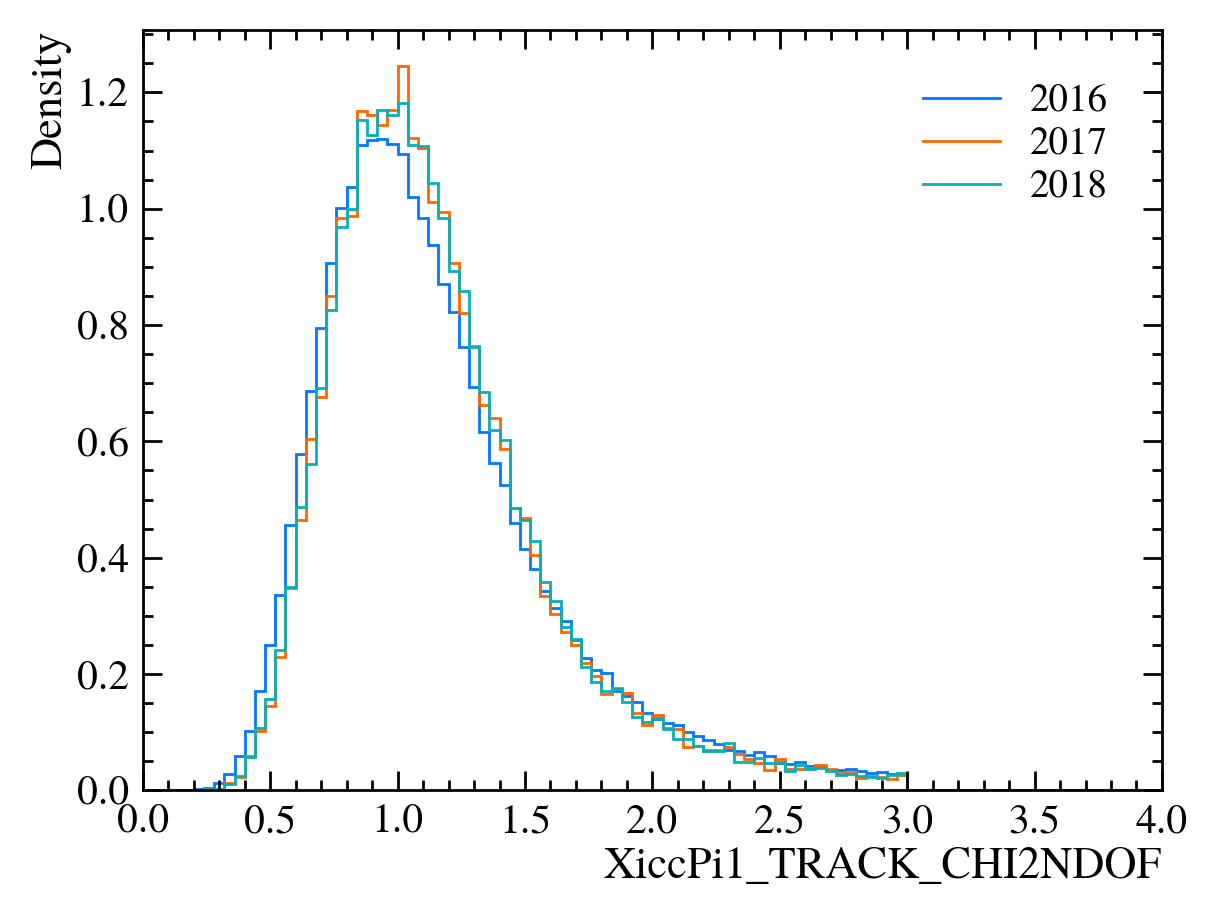

In [13]:
plot(data_df16.XiccPi1_TRACK_CHI2NDOF, 100, 0, 4,'XiccPi1_TRACK_CHI2NDOF', density = True , label = r"2016")
plot(data_df17.XiccPi1_TRACK_CHI2NDOF, 100, 0, 4,'XiccPi1_TRACK_CHI2NDOF', density = True  , label = r"2017")
plot(data_df18.XiccPi1_TRACK_CHI2NDOF, 100, 0, 4,'XiccPi1_TRACK_CHI2NDOF', density = True  , label = r"2018")
plt.legend(loc='best')

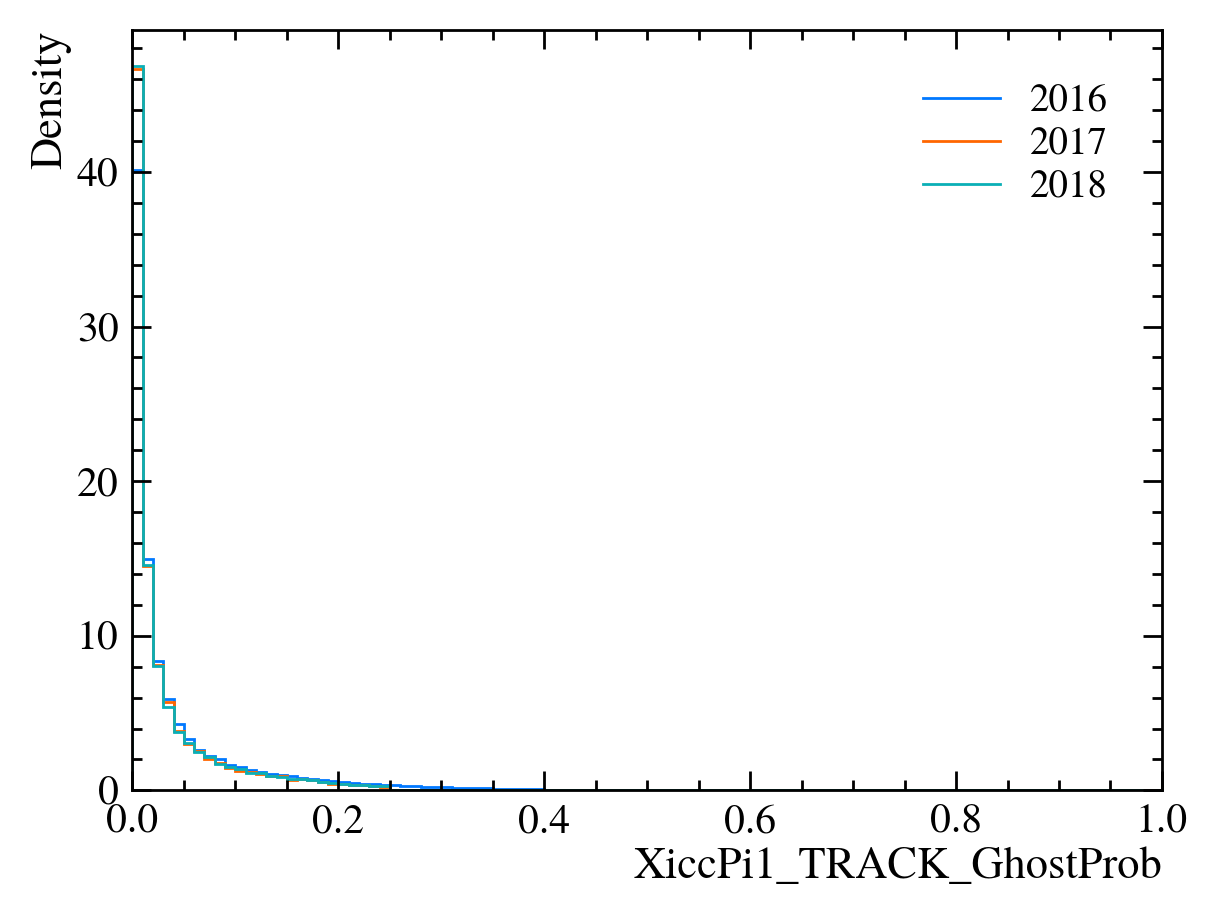

In [12]:
plot(data_df16.XiccPi1_TRACK_GhostProb, 100, 0, 1,'XiccPi1_TRACK_GhostProb', density = True , label = r"2016")
plot(data_df17.XiccPi1_TRACK_GhostProb, 100, 0, 1,'XiccPi1_TRACK_GhostProb', density = True  , label = r"2017")
plot(data_df18.XiccPi1_TRACK_GhostProb, 100, 0, 1,'XiccPi1_TRACK_GhostProb', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccPi1_IPCHI2_OWNPV, 100, 0, 20,'XiccPi1_IPCHI2_OWNPV', density = True , label = r"2016")
plot(data_df17.XiccPi1_IPCHI2_OWNPV, 100, 0, 20,'XiccPi1_IPCHI2_OWNPV', density = True  , label = r"2017")
plot(data_df18.XiccPi1_IPCHI2_OWNPV, 100, 0, 20,'XiccPi1_IPCHI2_OWNPV', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccPi1_PT, 100, 0, 600,'XiccPi1_PT', density = True , label = r"2016")
plot(data_df17.XiccPi1_PT, 100, 0, 600,'XiccPi1_PT', density = True  , label = r"2017")
plot(data_df18.XiccPi1_PT, 100, 0, 600,'XiccPi1_PT', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccPi1_P, 100, 0, 50000,'XiccPi1_P', density = True , label = r"2016")
plot(data_df17.XiccPi1_P, 100, 0, 50000,'XiccPi1_P', density = True  , label = r"2017")
plot(data_df18.XiccPi1_P, 100, 0, 50000,'XiccPi1_P', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccPi1_ProbNNpi, 100, 0, 1,'XiccPi1_ProbNNk', density = True , label = r"2016")
plot(data_df17.XiccPi1_ProbNNpi, 100, 0, 1,'XiccPi1_ProbNNk', density = True  , label = r"2017")
plot(data_df18.XiccPi1_ProbNNpi, 100, 0, 1,'XiccPi1_ProbNNk', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16.XiccPi1_PIDK, 100, -20, 15,'XiccPi1_PIDK', density = True , label = r"2016")
plot(data_df17.XiccPi1_PIDK, 100, -20, 15,'XiccPi1_PIDK', density = True  , label = r"2017")
plot(data_df18.XiccPi1_PIDK, 100, -20, 15,'XiccPi1_PIDK', density = True  , label = r"2018")
plt.legend(loc='best')

## Xicc

In [ ]:
# plot(data_df16.sum_Xicc_Daughters_PT, 100, 0, 10000,'sum_Xicc_Daughters_PT', density = True , label = r"2016")
# plot(data_df17.sum_Xicc_Daughters_PT, 100, 0, 10000,'sum_Xicc_Daughters_PT', density = True  , label = r"2017")
# plot(data_df18.sum_Xicc_Daughters_PT, 100, 0, 10000,'sum_Xicc_Daughters_PT', density = True  , label = r"2018")
# plt.legend(loc='best')

In [ ]:
# plot(data_df16_cuts.Xicc_ENDVERTEX_CHI2_NDOF, 100, 0, 30,'Xicc_ENDVERTEX_CHI2_NDOF', density = True , label = r"2016 with cuts")
plot(data_df16.Xicc_ENDVERTEX_CHI2_NDOF, 100, 0, 30,'Xicc_ENDVERTEX_CHI2_NDOF', density = True , label = r"2016")
plot(data_df17.Xicc_ENDVERTEX_CHI2_NDOF, 100, 0, 30,'Xicc_ENDVERTEX_CHI2_NDOF', density = True  , label = r"2017")
plot(data_df18.Xicc_ENDVERTEX_CHI2_NDOF, 100, 0, 30,'Xicc_ENDVERTEX_CHI2_NDOF', density = True  , label = r"2018")
plot(data_df18b.Xicc_ENDVERTEX_CHI2_NDOF, 100, 0, 30,'Xicc_ENDVERTEX_CHI2_NDOF', density = True  , label = r"2018b")
plt.legend(loc='best')

In [ ]:
plot(data_df16_cuts.Xicc_ENDVERTEX_CHI2_NDOF, 100, 0, 30,'Xicc_ENDVERTEX_CHI2_NDOF', density = True , label = r"2016 with cuts")
plot(data_df17_cuts.Xicc_ENDVERTEX_CHI2_NDOF, 100, 0, 30,'Xicc_ENDVERTEX_CHI2_NDOF', density = True  , label = r"2017 with cuts")
plot(data_df18_cuts.Xicc_ENDVERTEX_CHI2_NDOF, 100, 0, 30,'Xicc_ENDVERTEX_CHI2_NDOF', density = True  , label = r"2018 with cuts")
plt.legend(loc='best')

In [ ]:
# plot(data_df16_cuts.Xicc_IPCHI2_OWNPV, 100, 0, 30,'Xicc_IPCHI2_OWNPV', density = True , label = r"2016 w cuts")
plot(data_df16.Xicc_IPCHI2_OWNPV, 100, 0, 30,'Xicc_IPCHI2_OWNPV', density = True , label = r"2016")
plot(data_df17.Xicc_IPCHI2_OWNPV, 100, 0, 30,'Xicc_IPCHI2_OWNPV', density = True  , label = r"2017")
plot(data_df18.Xicc_IPCHI2_OWNPV, 100, 0, 30,'Xicc_IPCHI2_OWNPV', density = True  , label = r"2018")
plot(data_df18b.Xicc_IPCHI2_OWNPV, 100, 0, 30,'Xicc_IPCHI2_OWNPV', density = True  , label = r"2018b")
plt.legend(loc='best')

In [ ]:
plot(data_df16_cuts.Xicc_IPCHI2_OWNPV, 100, 0, 30,'Xicc_IPCHI2_OWNPV', density = True  , label = r"2016 w cuts")
plot(data_df17_cuts.Xicc_IPCHI2_OWNPV, 100, 0, 30,'Xicc_IPCHI2_OWNPV', density = True  , label = r"2017 w cuts")
plot(data_df18_cuts.Xicc_IPCHI2_OWNPV, 100, 0, 30,'Xicc_IPCHI2_OWNPV', density = True  , label = r"2018 w cuts")
plt.legend(loc='best')

In [ ]:
plot(np.log(data_df16_cuts.Xicc_IPCHI2_OWNPV), 100, -6, 4,'log(Xicc_IPCHI2_OWNPV)', density = True  , label = r"2016 w cuts")
plot(np.log(data_df17_cuts.Xicc_IPCHI2_OWNPV), 100, -6, 4,'log(Xicc_IPCHI2_OWNPV)', density = True  , label = r"2017 w cuts")
plot(np.log(data_df18_cuts.Xicc_IPCHI2_OWNPV), 100, -6, 4,'log(Xicc_IPCHI2_OWNPV)', density = True  , label = r"2018 w cuts")
plt.legend(loc='best')

In [ ]:
plot(data_df16.Xicc_DIRA_OWNPV, 100, 0.999, 1,'Xicc_DIRA_OWNPV', density = True , label = r"2016")
plot(data_df17.Xicc_DIRA_OWNPV, 100, 0.999, 1,'Xicc_DIRA_OWNPV', density = True  , label = r"2017")
plot(data_df18.Xicc_DIRA_OWNPV, 100, 0.999, 1,'Xicc_DIRA_OWNPV', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16_cuts.Xicc_DIRA_OWNPV, 100, 0.999, 1,'Xicc_DIRA_OWNPV', density = True , label = r"2016 w cuts")
plot(data_df17_cuts.Xicc_DIRA_OWNPV, 100, 0.999, 1,'Xicc_DIRA_OWNPV', density = True  , label = r"2017 w cuts")
plot(data_df18_cuts.Xicc_DIRA_OWNPV, 100, 0.999, 1,'Xicc_DIRA_OWNPV', density = True  , label = r"2018 w cuts")
plt.legend(loc='best')

# MVA Variables

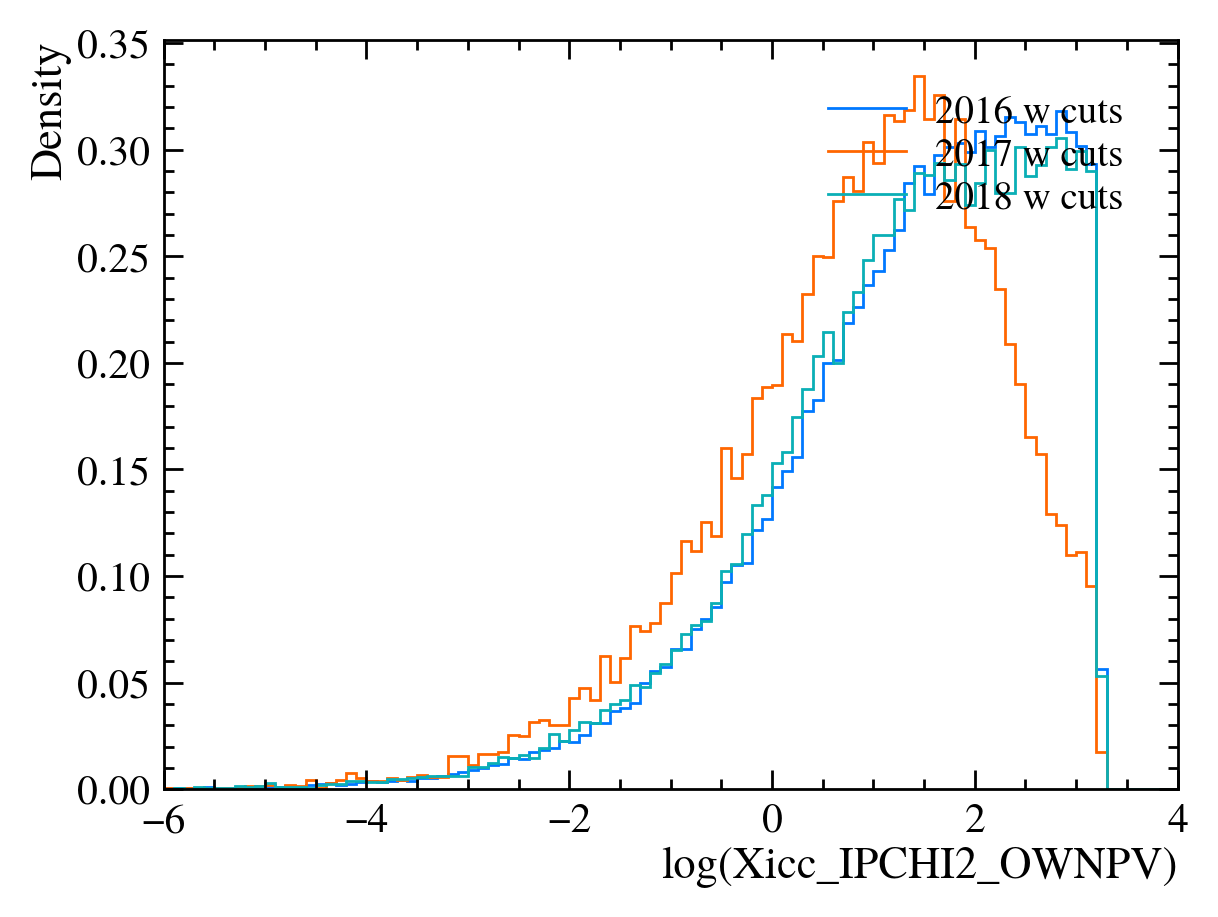

In [78]:
plot(np.log(data_df16_cuts.Xicc_IPCHI2_OWNPV), 100, -6, 4,'log(Xicc_IPCHI2_OWNPV)', density = True  , label = r"2016 w cuts")
plot(np.log(data_df17_cuts.Xicc_IPCHI2_OWNPV), 100, -6, 4,'log(Xicc_IPCHI2_OWNPV)', density = True  , label = r"2017 w cuts")
plot(np.log(data_df18b_cuts.Xicc_IPCHI2_OWNPV), 100, -6, 4,'log(Xicc_IPCHI2_OWNPV)', density = True  , label = r"2018 w cuts")
plt.legend(loc='best')

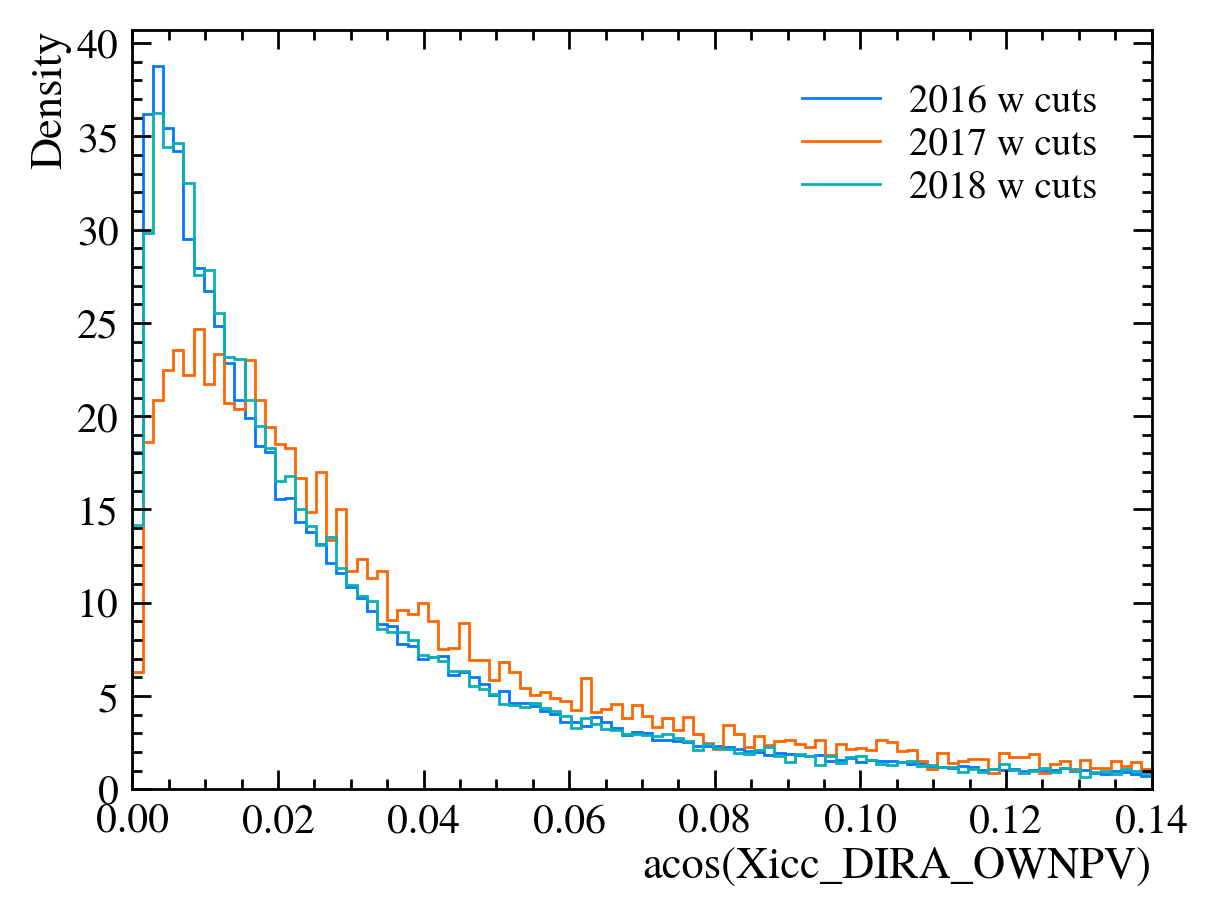

In [79]:
plot(np.arccos(data_df16_cuts.Xicc_DIRA_OWNPV), 100, 0, 0.14,'acos(Xicc_DIRA_OWNPV)', density = True , label = r"2016 w cuts")
plot(np.arccos(data_df17_cuts.Xicc_DIRA_OWNPV), 100, 0, 0.14,'acos(Xicc_DIRA_OWNPV)', density = True  , label = r"2017 w cuts")
plot(np.arccos(data_df18b_cuts.Xicc_DIRA_OWNPV), 100, 0, 0.14,'acos(Xicc_DIRA_OWNPV)', density = True  , label = r"2018 w cuts")
plt.legend(loc='best')

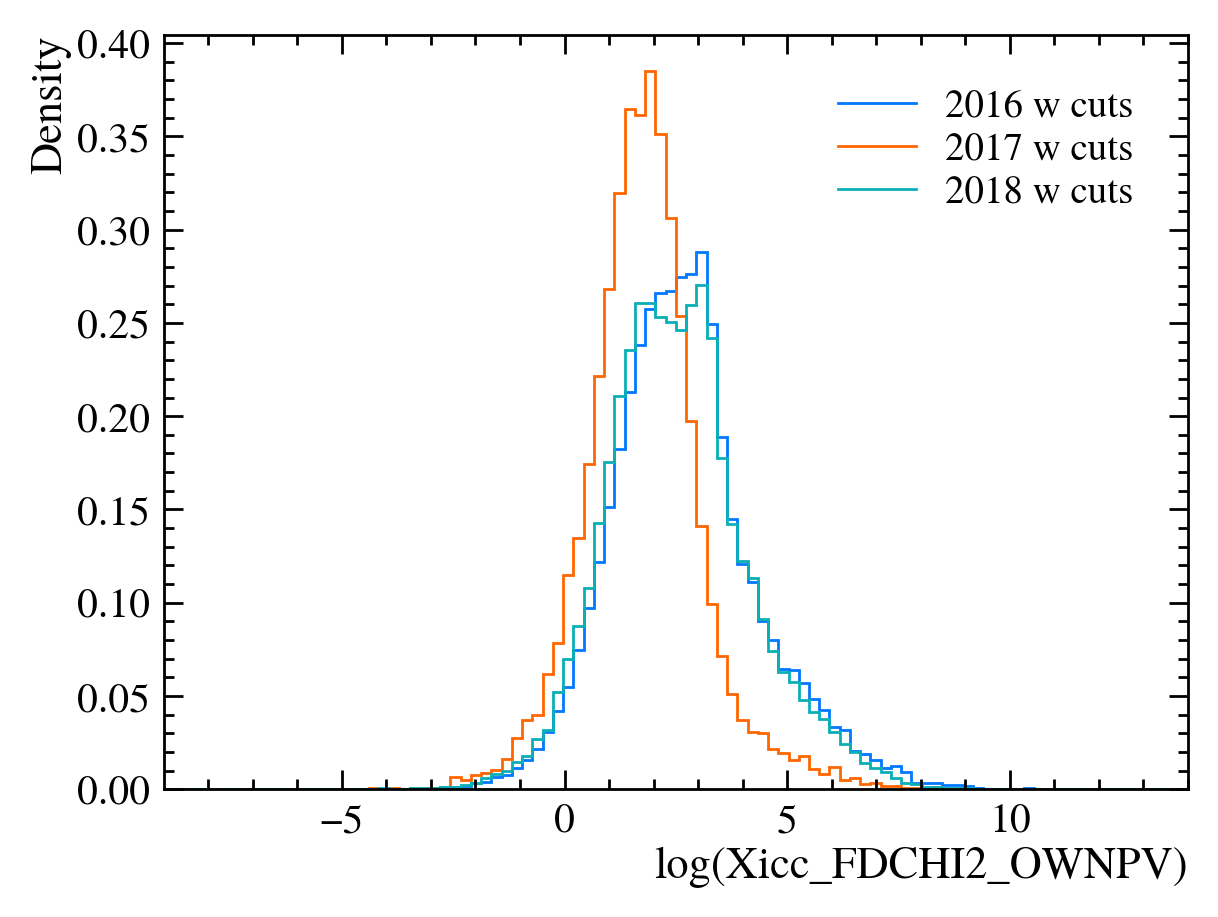

In [80]:
plot(np.log(data_df16_cuts.Xicc_FDCHI2_OWNPV), 100, -9, 14,'log(Xicc_FDCHI2_OWNPV)', density = True  , label = r"2016 w cuts")
plot(np.log(data_df17_cuts.Xicc_FDCHI2_OWNPV), 100, -9, 14,'log(Xicc_FDCHI2_OWNPV)', density = True  , label = r"2017 w cuts")
plot(np.log(data_df18b_cuts.Xicc_FDCHI2_OWNPV), 100, -9, 14,'log(Xicc_FDCHI2_OWNPV)', density = True  , label = r"2018 w cuts")
plt.legend(loc='best')

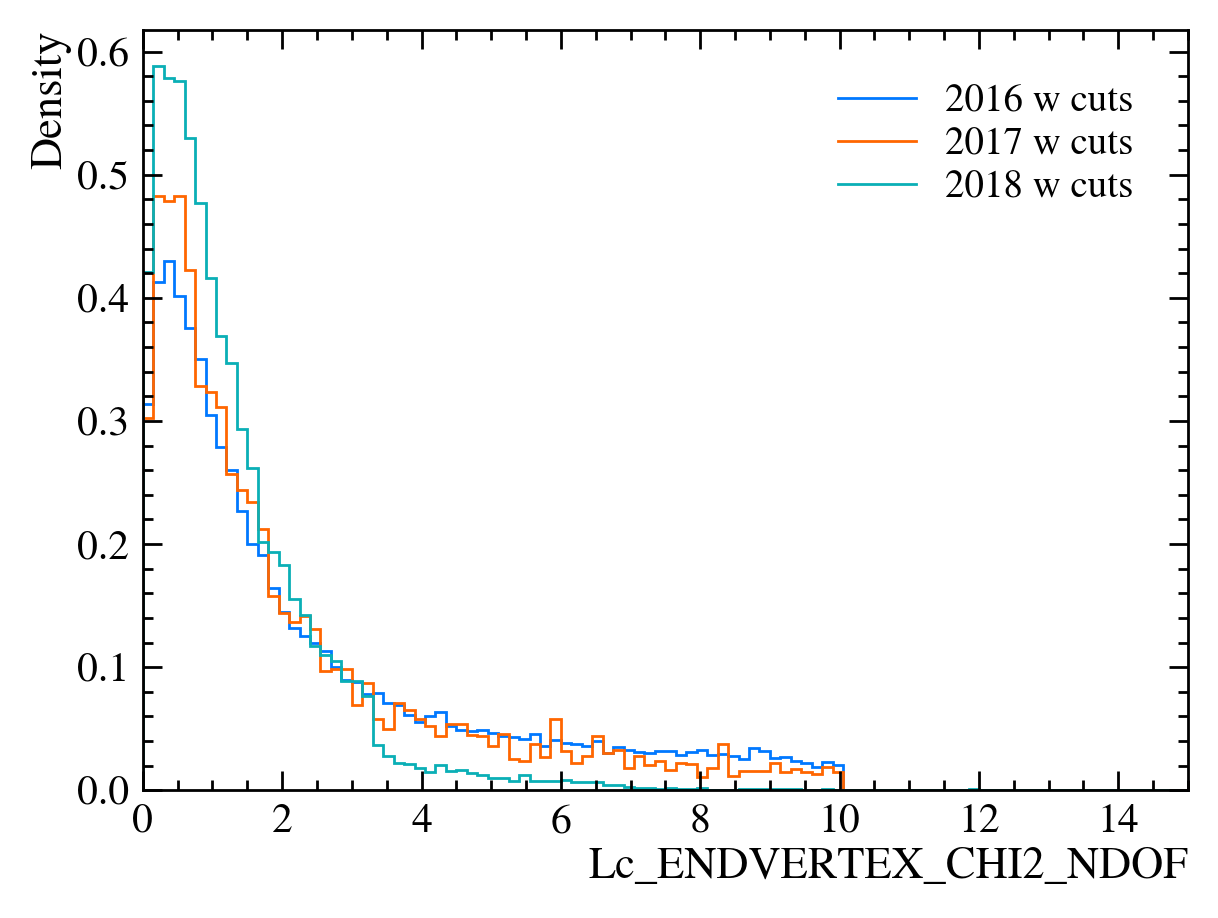

In [87]:
plot(data_df16_cuts.Lc_ENDVERTEX_CHI2_NDOF, 100, 0, 15,'Lc_ENDVERTEX_CHI2_NDOF', density = True , label = r"2016 w cuts")
plot(data_df17_cuts.Lc_ENDVERTEX_CHI2_NDOF, 100, 0, 15,'Lc_ENDVERTEX_CHI2_NDOF', density = True  , label = r"2017 w cuts")
plot(data_df18b_cuts.Lc_ENDVERTEX_CHI2_NDOF, 100, 0, 15,'Lc_ENDVERTEX_CHI2_NDOF', density = True  , label = r"2018 w cuts")
plt.legend(loc='best')

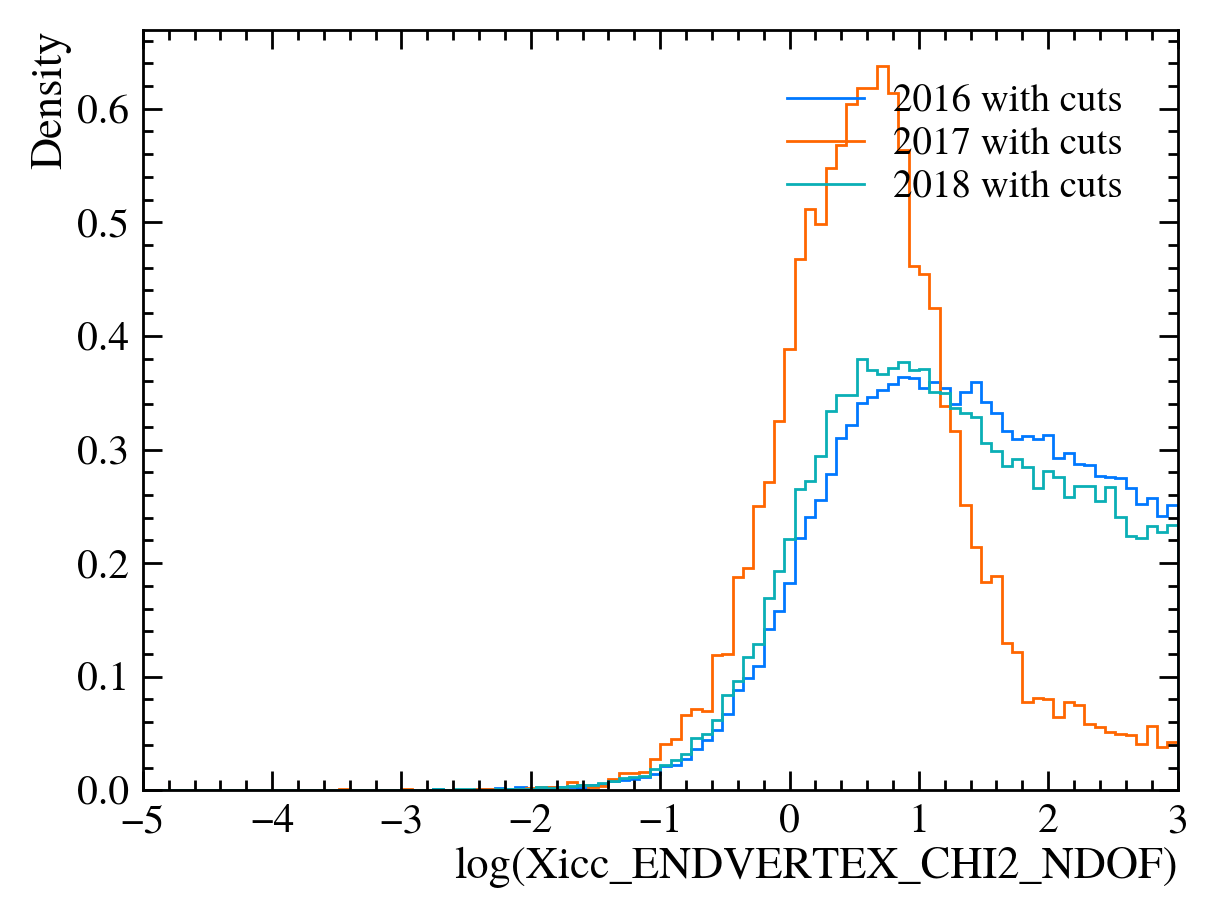

In [82]:
plot(np.log(data_df16_cuts.Xicc_ENDVERTEX_CHI2_NDOF), 100, -5, 3,'log(Xicc_ENDVERTEX_CHI2_NDOF)', density = True , label = r"2016 with cuts")
plot(np.log(data_df17_cuts.Xicc_ENDVERTEX_CHI2_NDOF), 100, -5, 3,'log(Xicc_ENDVERTEX_CHI2_NDOF)', density = True  , label = r"2017 with cuts")
plot(np.log(data_df18b_cuts.Xicc_ENDVERTEX_CHI2_NDOF), 100, -5, 3,'log(Xicc_ENDVERTEX_CHI2_NDOF)', density = True  , label = r"2018 with cuts")
plt.legend(loc='best')

In [29]:
plot(data_df16_cuts.LcP_PIDp, 100, 0, 100,'LcP_PIDp', density = True , label = r"2016")
plot(data_df17_cuts.LcP_PIDp, 100, 0, 100,'LcP_PIDp', density = True  , label = r"2017")
plot(data_df18b_cuts.LcP_PIDp, 100, 0, 100,'LcP_PIDp', density = True  , label = r"2018")
plt.legend(loc='best')

AttributeError: 'DataFrame' object has no attribute 'LcP_PIDp'

In [ ]:
plot(data_df16_cuts.LcK_PIDK, 100, 0, 100,'LcK_PIDK', density = True , label = r"2016")
plot(data_df17_cuts.LcK_PIDK, 100, 0, 100,'LcK_PIDK', density = True  , label = r"2017")
plot(data_df18b_cuts.LcK_PIDK, 100, 0, 100,'LcK_PIDK', density = True  , label = r"2018")
plt.legend(loc='best')

In [ ]:
plot(data_df16_cuts.LcPi_PIDK, 100, -100, 10,'LcPi_PIDK', density = True , label = r"2016")
plot(data_df17_cuts.LcPi_PIDK, 100, -100, 10,'LcPi_PIDK', density = True  , label = r"2017")
plot(data_df18b_cuts.LcPi_PIDK, 100, -100, 10,'LcPi_PIDK', density = True  , label = r"2018")
plt.legend(loc='best')

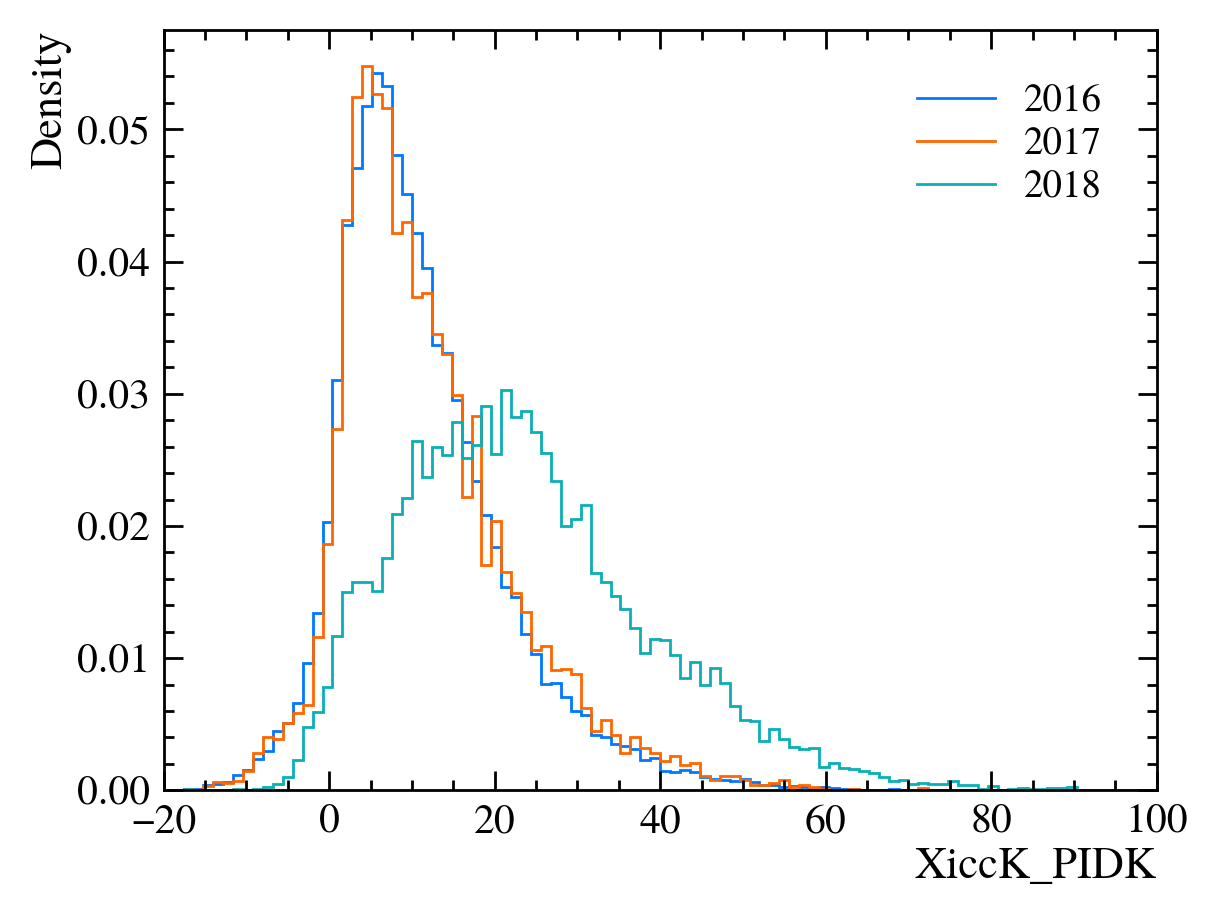

In [30]:
plot(data_df16_cuts.XiccK_PIDK, 100, -20, 100,'XiccK_PIDK', density = True , label = r"2016")
plot(data_df17_cuts.XiccK_PIDK, 100, -20, 100,'XiccK_PIDK', density = True  , label = r"2017")
plot(data_df18b_cuts.XiccK_PIDK, 100, -20, 100,'XiccK_PIDK', density = True  , label = r"2018")
plt.legend(loc='best')

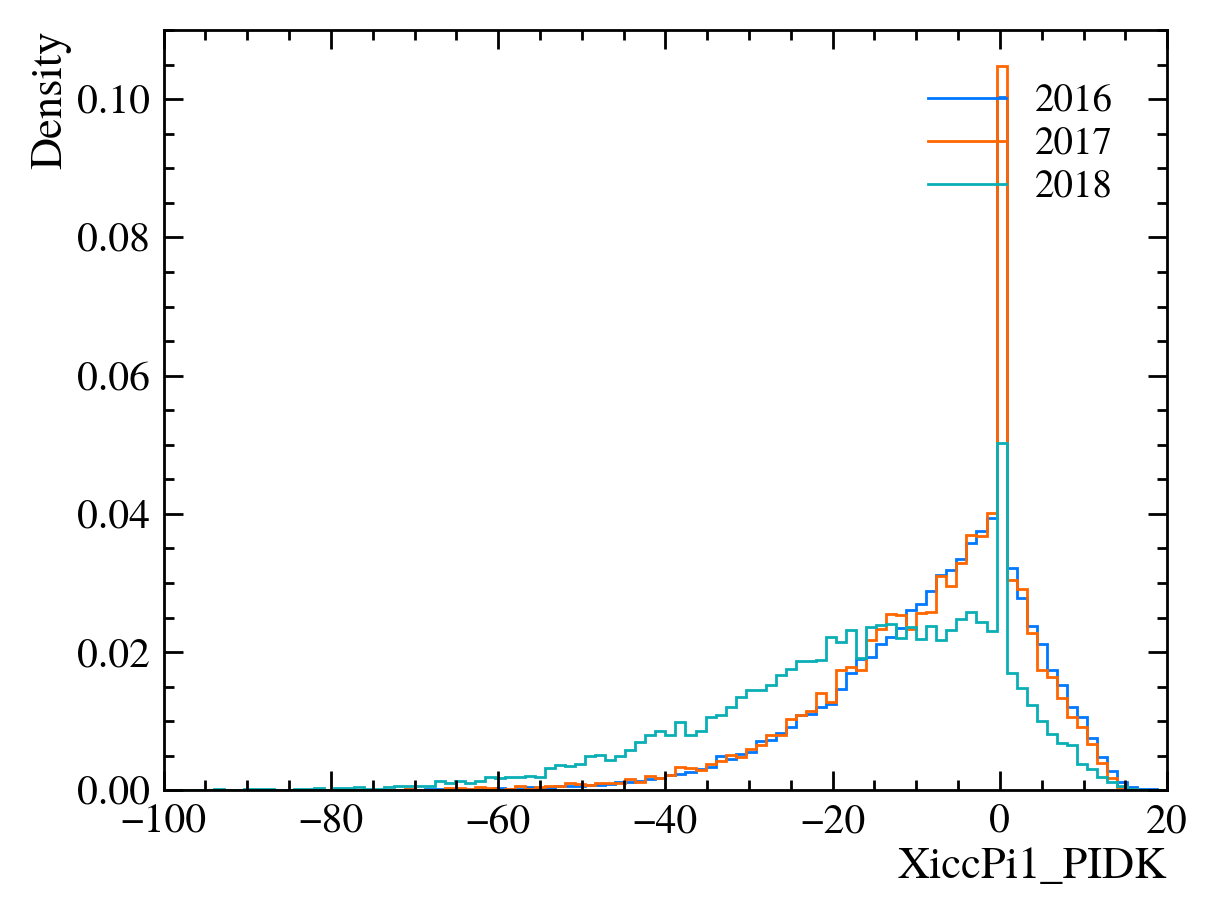

In [31]:
plot(data_df16_cuts.XiccPi1_PIDK, 100, -100, 20,'XiccPi1_PIDK', density = True , label = r"2016")
plot(data_df17_cuts.XiccPi1_PIDK, 100, -100, 20,'XiccPi1_PIDK', density = True  , label = r"2017")
plot(data_df18b_cuts.XiccPi1_PIDK, 100, -100, 20,'XiccPi1_PIDK', density = True  , label = r"2018")
plt.legend(loc='best')

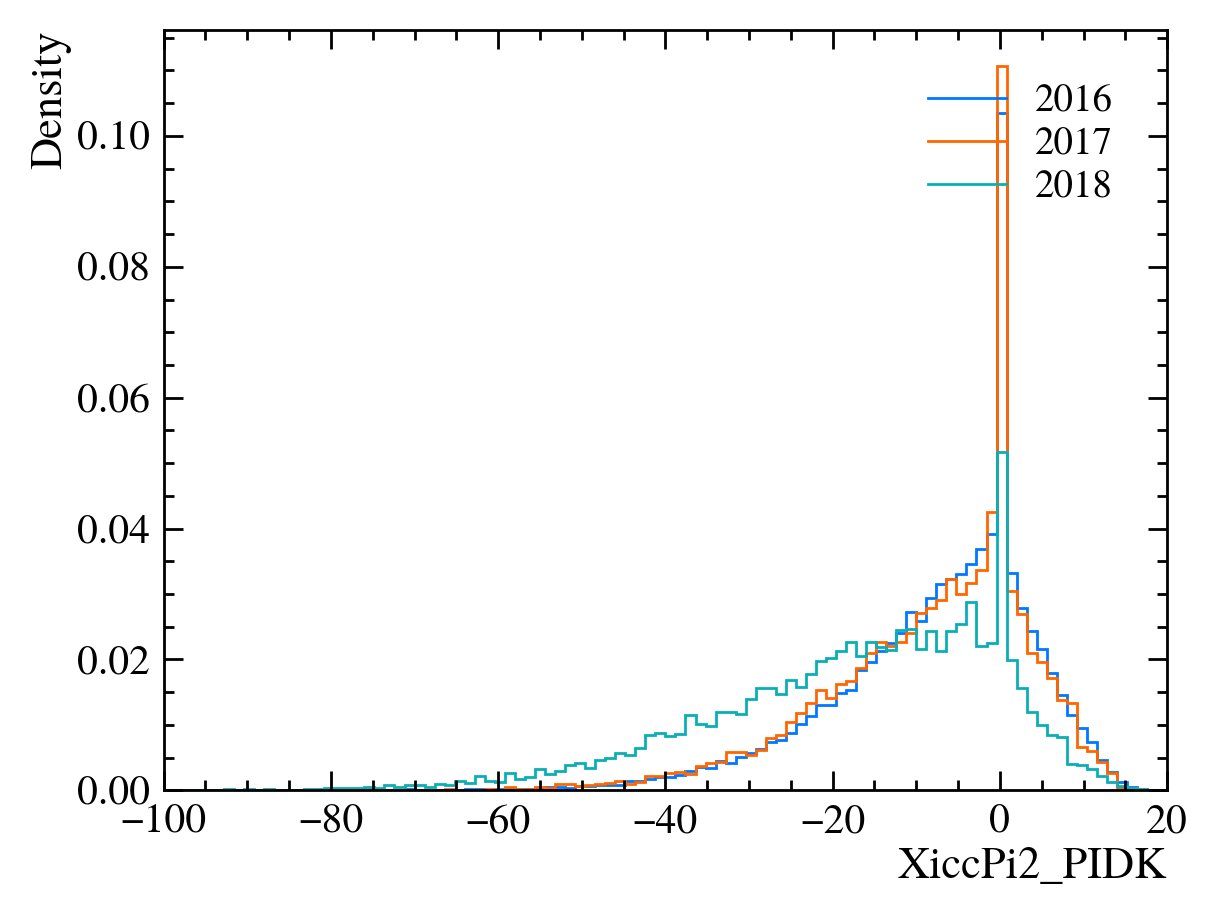

In [32]:
plot(data_df16_cuts.XiccPi2_PIDK, 100, -100, 20,'XiccPi2_PIDK', density = True , label = r"2016")
plot(data_df17_cuts.XiccPi2_PIDK, 100, -100, 20,'XiccPi2_PIDK', density = True  , label = r"2017")
plot(data_df18b_cuts.XiccPi2_PIDK, 100, -100, 20,'XiccPi2_PIDK', density = True  , label = r"2018")
plt.legend(loc='best')

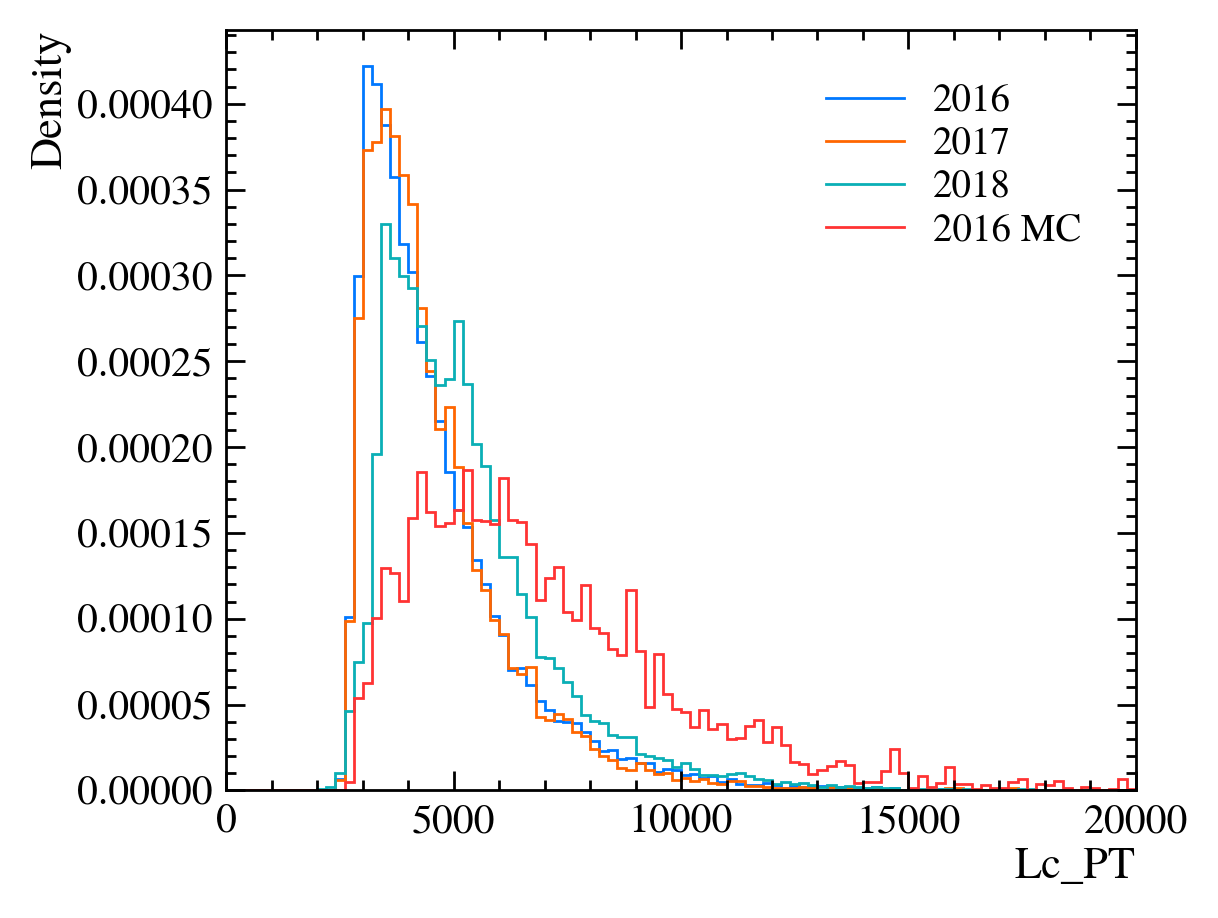

In [70]:
plot(data_df16_cuts.Lc_PT, 100, 0, 20000,'Lc_PT', density = True , label = r"2016")
plot(data_df17_cuts.Lc_PT, 100, 0, 20000,'Lc_PT', density = True  , label = r"2017")
plot(data_df18b_cuts.Lc_PT, 100, 0, 20000,'Lc_PT', density = True  , label = r"2018")
plot(data_df16mc_cuts.Lc_PT, 100, 0, 20000,'Lc_PT', density = True  , label = r"2016 MC")

plt.legend(loc='best')

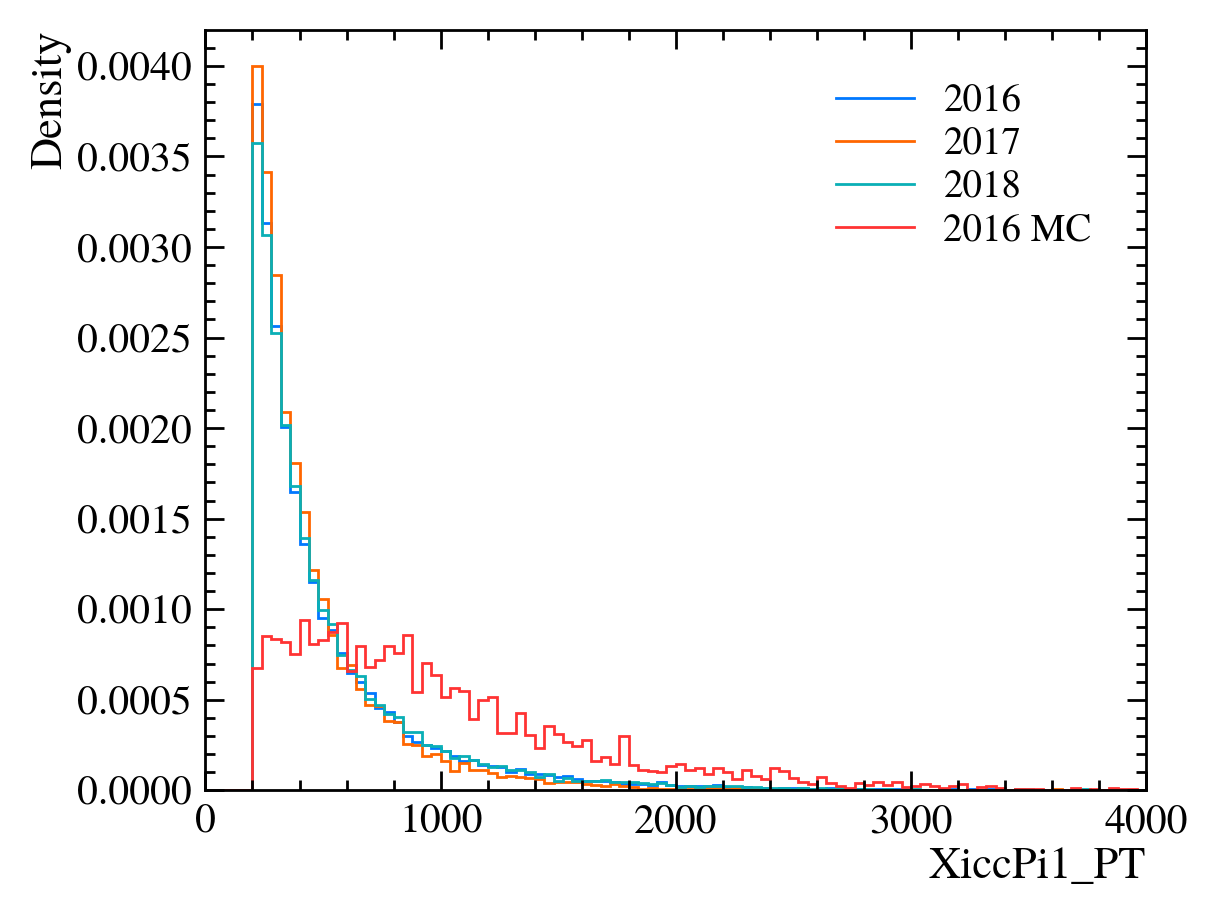

In [71]:
plot(data_df16_cuts.XiccPi1_PT, 100, 0, 4000,'XiccPi1_PT', density = True , label = r"2016")
plot(data_df17_cuts.XiccPi1_PT, 100, 0, 4000,'XiccPi1_PT', density = True  , label = r"2017")
plot(data_df18b_cuts.XiccPi1_PT, 100, 0, 4000,'XiccPi1_PT', density = True  , label = r"2018")
plot(data_df16mc_cuts.XiccPi1_PT, 100, 0, 4000,'XiccPi1_PT', density = True  , label = r"2016 MC")

plt.legend(loc='best')

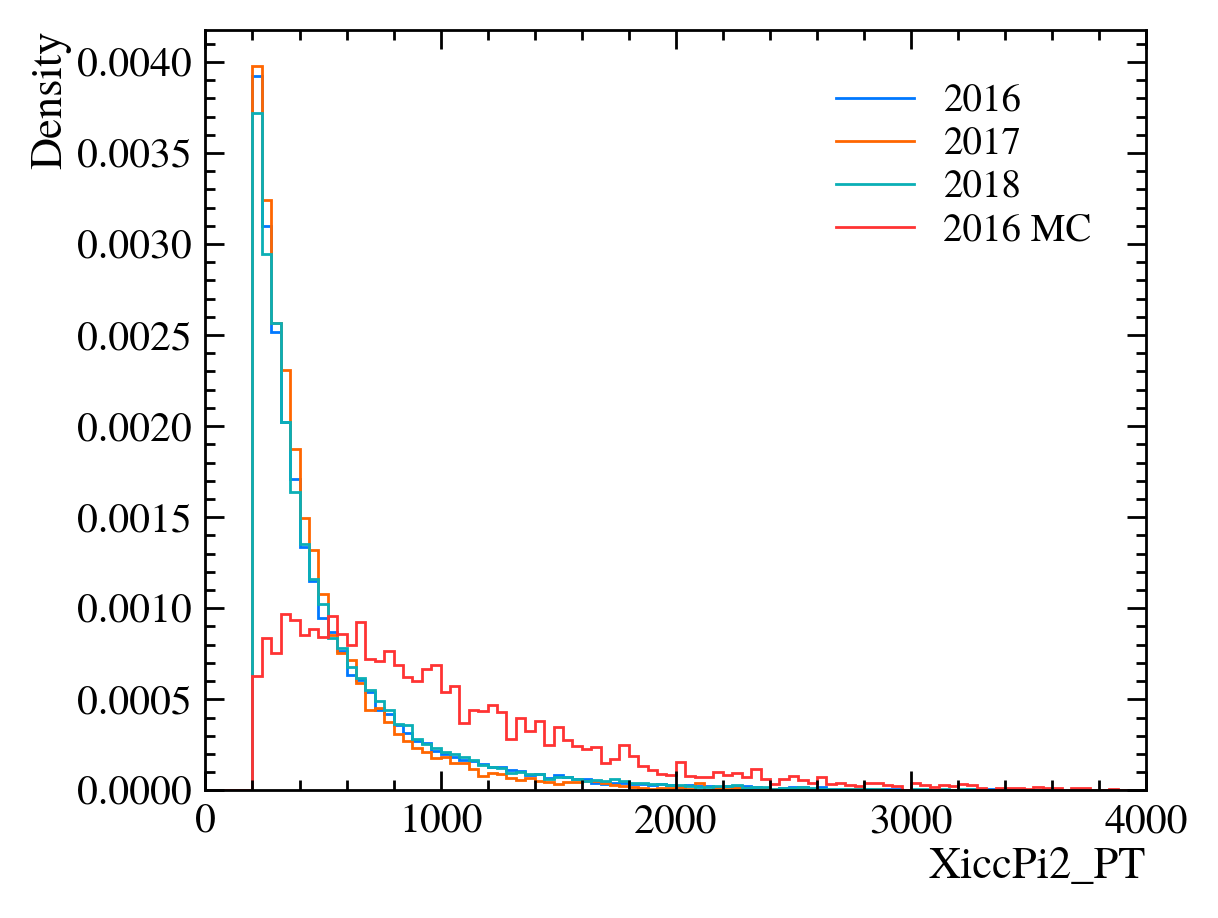

In [72]:
plot(data_df16_cuts.XiccPi2_PT, 100, 0, 4000,'XiccPi2_PT', density = True , label = r"2016")
plot(data_df17_cuts.XiccPi2_PT, 100, 0, 4000,'XiccPi2_PT', density = True  , label = r"2017")
plot(data_df18b_cuts.XiccPi2_PT, 100, 0, 4000,'XiccPi2_PT', density = True  , label = r"2018")
plot(data_df16mc_cuts.XiccPi2_PT, 100, 0, 4000,'XiccPi2_PT', density = True  , label = r"2016 MC")

plt.legend(loc='best')

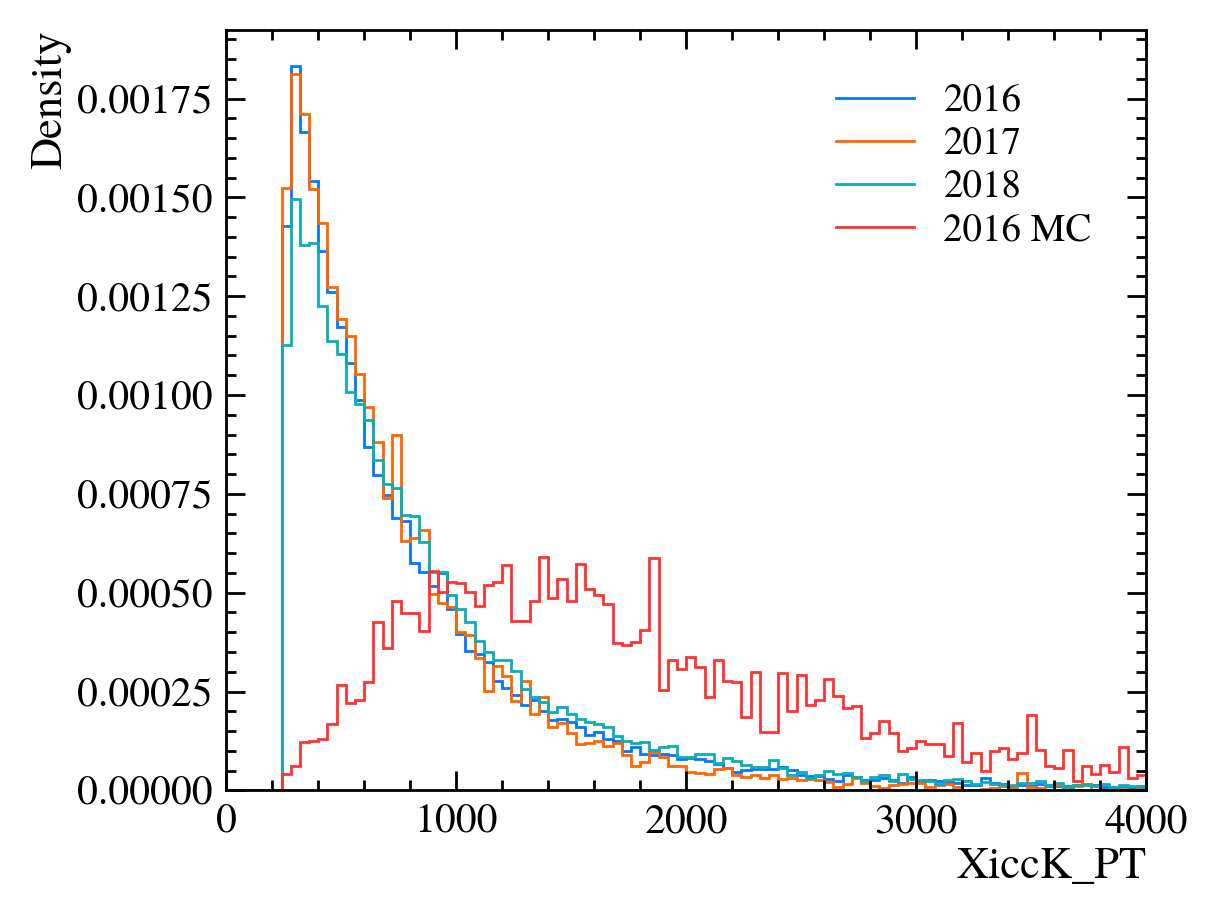

In [73]:
plot(data_df16_cuts.XiccK_PT, 100, 0, 4000,'XiccK_PT', density = True , label = r"2016")
plot(data_df17_cuts.XiccK_PT, 100, 0, 4000,'XiccK_PT', density = True  , label = r"2017")
plot(data_df18b_cuts.XiccK_PT, 100, 0, 4000,'XiccK_PT', density = True  , label = r"2018")
plot(data_df16mc_cuts.XiccK_PT, 100, 0, 4000,'XiccK_PT', density = True  , label = r"2016 MC")
plt.legend(loc='best')

/cvmfs/lhcbdev.cern.ch/conda/envs/default/2022-11-21_11-58/linux-64/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


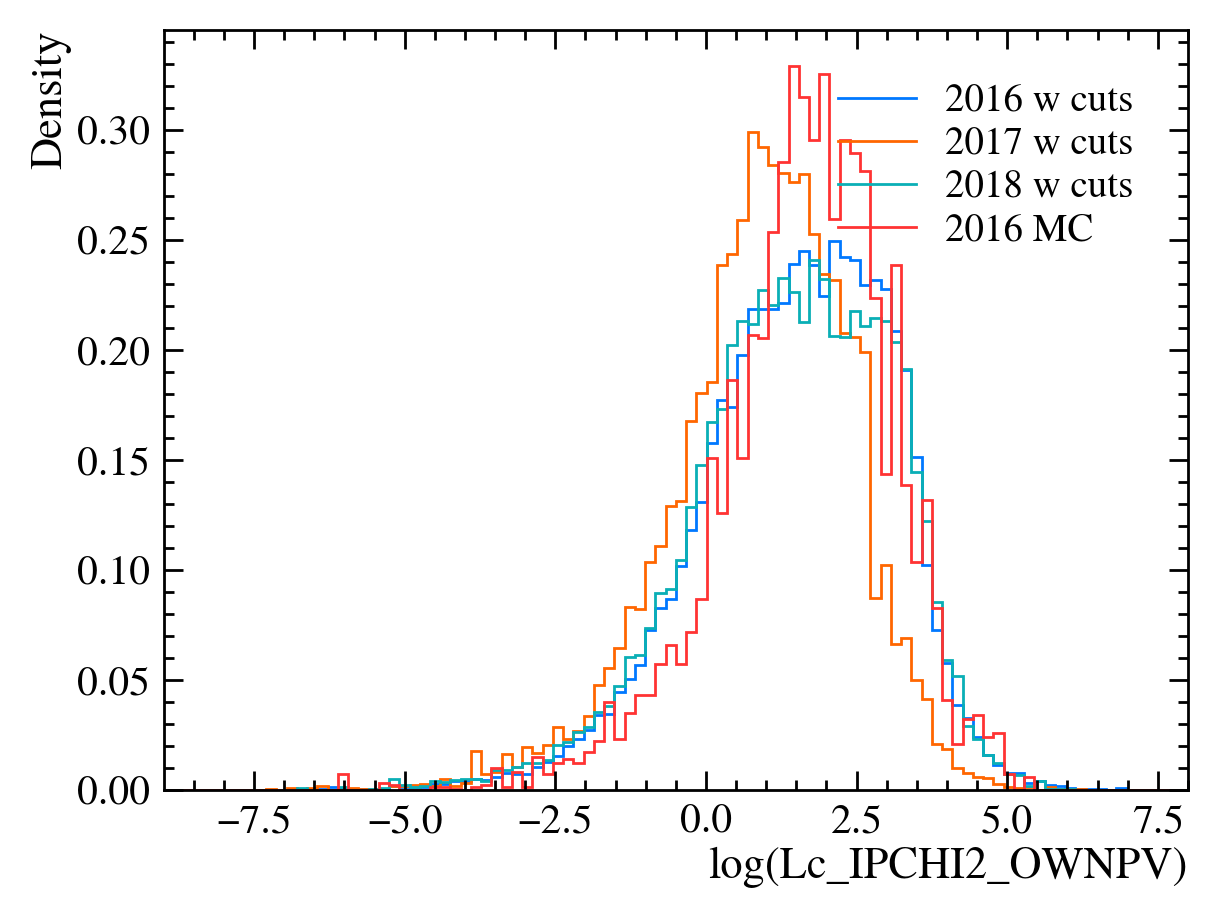

In [74]:
plot(np.log(data_df16_cuts.Lc_IPCHI2_OWNPV), 100, -9, 8,'log(Lc_IPCHI2_OWNPV)', density = True  , label = r"2016 w cuts")
plot(np.log(data_df17_cuts.Lc_IPCHI2_OWNPV), 100, -9, 8,'log(Lc_IPCHI2_OWNPV)', density = True  , label = r"2017 w cuts")
plot(np.log(data_df18b_cuts.Lc_IPCHI2_OWNPV), 100, -9, 8,'log(Lc_IPCHI2_OWNPV)', density = True  , label = r"2018 w cuts")
plot(np.log(data_df16mc_cuts.Lc_IPCHI2_OWNPV), 100, -9, 8,'log(Lc_IPCHI2_OWNPV)', density = True  , label = r"2016 MC")

plt.legend(loc='best')

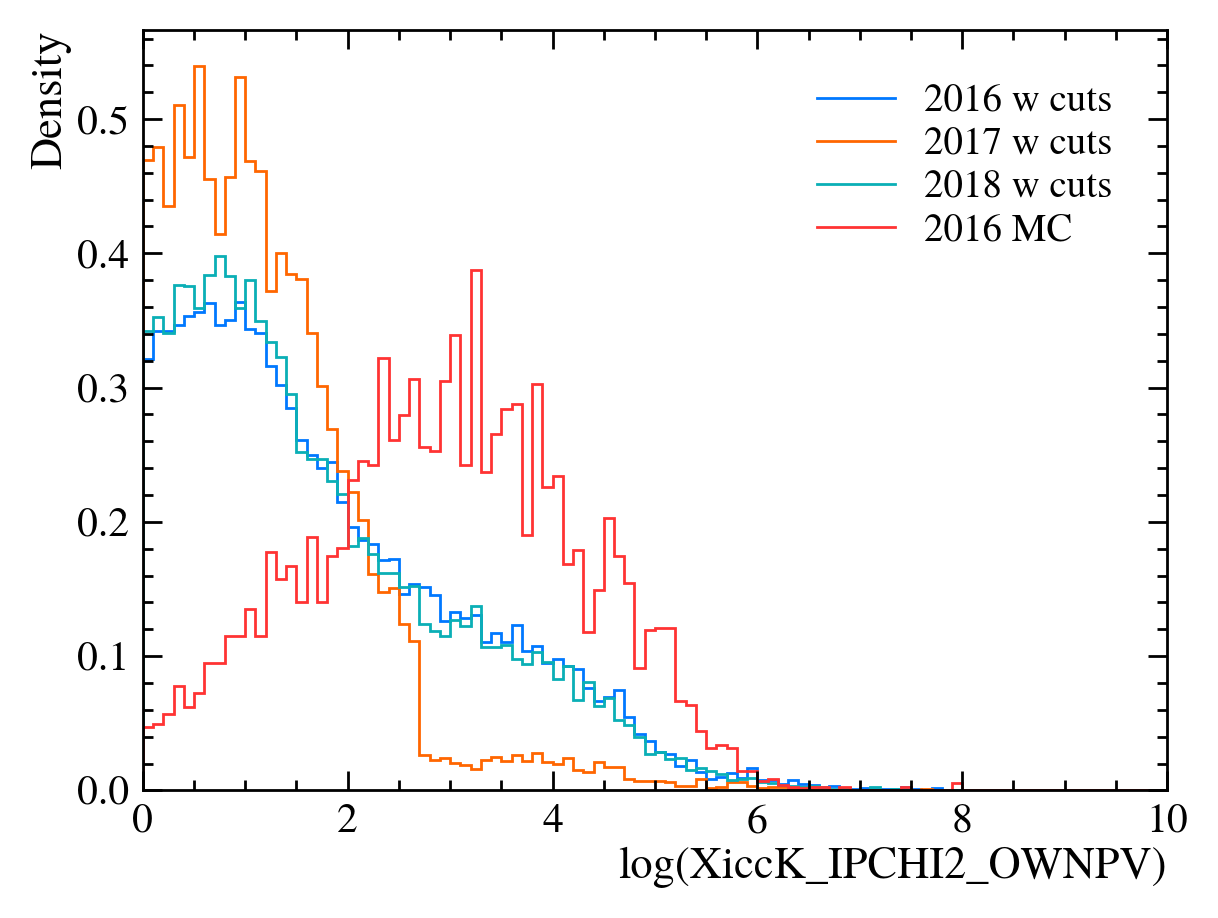

In [75]:
plot(np.log(data_df16_cuts.XiccK_IPCHI2_OWNPV), 100, 0, 10,'log(XiccK_IPCHI2_OWNPV)', density = True  , label = r"2016 w cuts")
plot(np.log(data_df17_cuts.XiccK_IPCHI2_OWNPV), 100, 0, 10,'log(XiccK_IPCHI2_OWNPV)', density = True  , label = r"2017 w cuts")
plot(np.log(data_df18b_cuts.XiccK_IPCHI2_OWNPV), 100, 0, 10,'log(XiccK_IPCHI2_OWNPV)', density = True  , label = r"2018 w cuts")
plot(np.log(data_df16mc_cuts.XiccK_IPCHI2_OWNPV), 100, 0, 10,'log(XiccK_IPCHI2_OWNPV)', density = True  , label = r"2016 MC")

plt.legend(loc='best')

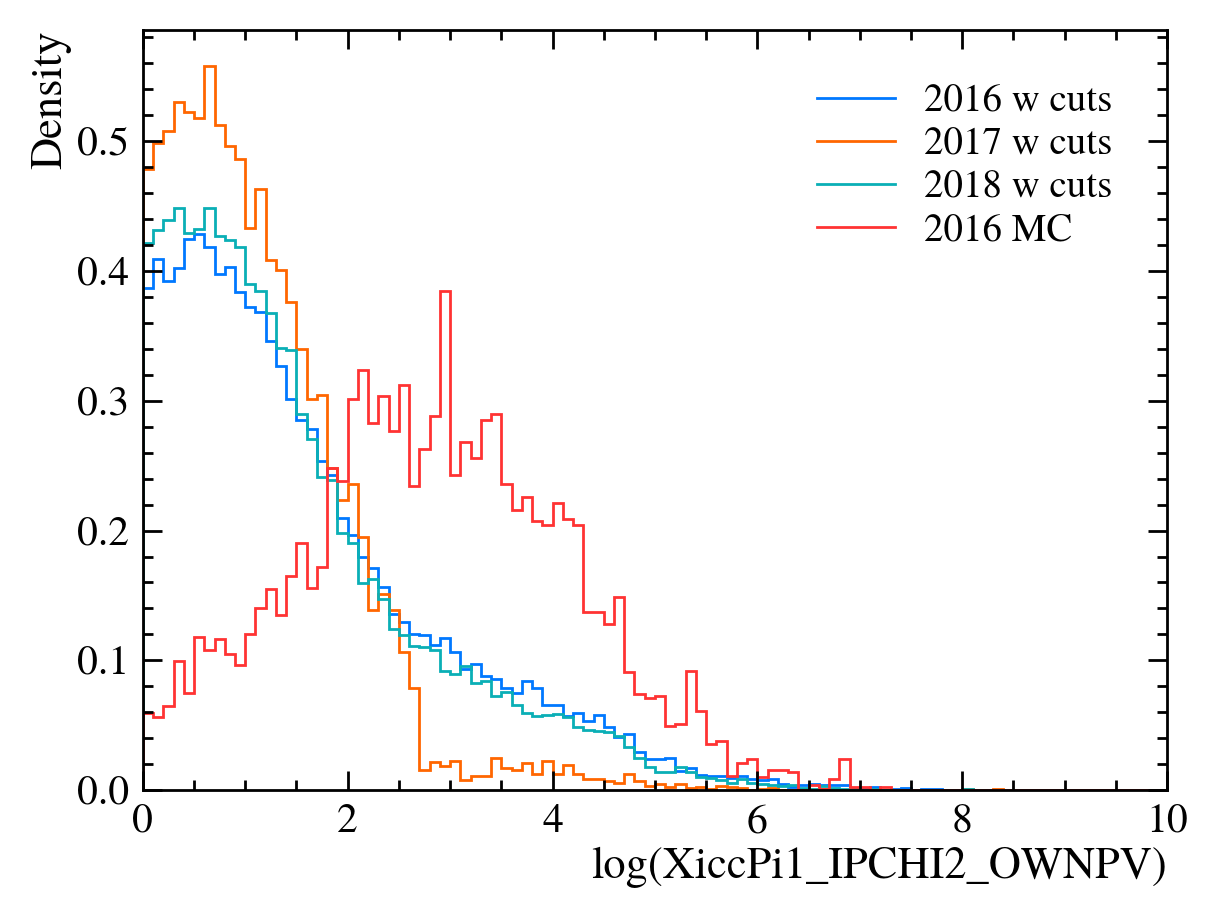

In [76]:
plot(np.log(data_df16_cuts.XiccPi1_IPCHI2_OWNPV), 100, 0, 10,'log(XiccPi1_IPCHI2_OWNPV)', density = True  , label = r"2016 w cuts")
plot(np.log(data_df17_cuts.XiccPi1_IPCHI2_OWNPV), 100, 0, 10,'log(XiccPi1_IPCHI2_OWNPV)', density = True  , label = r"2017 w cuts")
plot(np.log(data_df18b_cuts.XiccPi1_IPCHI2_OWNPV), 100, 0, 10,'log(XiccPi1_IPCHI2_OWNPV)', density = True  , label = r"2018 w cuts")
plot(np.log(data_df16mc_cuts.XiccPi1_IPCHI2_OWNPV), 100, 0, 10,'log(XiccPi1_IPCHI2_OWNPV)', density = True  , label = r"2016 MC")

plt.legend(loc='best')

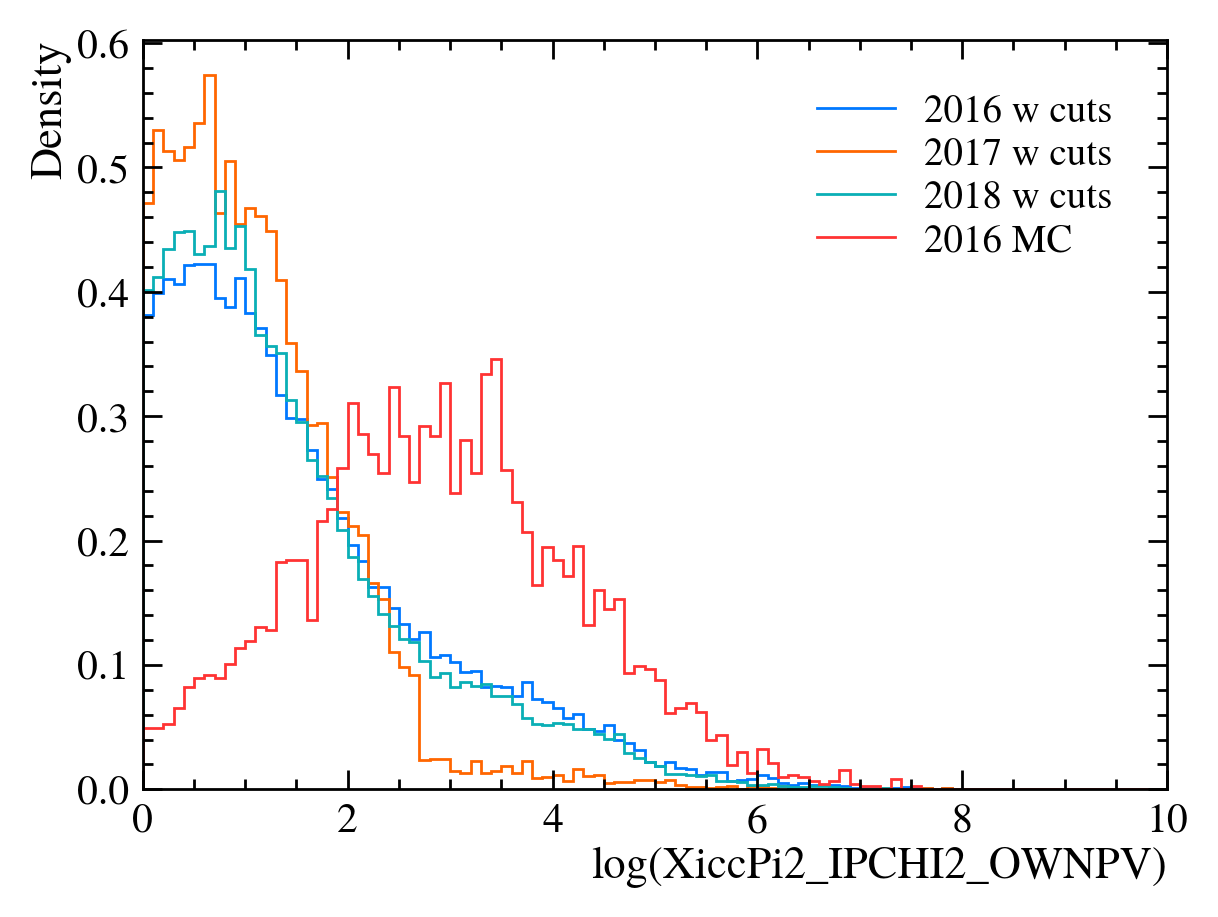

In [77]:
plot(np.log(data_df16_cuts.XiccPi2_IPCHI2_OWNPV), 100, 0, 10,'log(XiccPi2_IPCHI2_OWNPV)', density = True  , label = r"2016 w cuts")
plot(np.log(data_df17_cuts.XiccPi2_IPCHI2_OWNPV), 100, 0, 10,'log(XiccPi2_IPCHI2_OWNPV)', density = True  , label = r"2017 w cuts")
plot(np.log(data_df18b_cuts.XiccPi2_IPCHI2_OWNPV), 100, 0, 10,'log(XiccPi2_IPCHI2_OWNPV)', density = True  , label = r"2018 w cuts")
plot(np.log(data_df16mc_cuts.XiccPi2_IPCHI2_OWNPV), 100, 0, 10,'log(XiccPi2_IPCHI2_OWNPV)', density = True  , label = r"2016 MC")
plt.legend(loc='best')